<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/HW_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='7'>**–î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞**</font>  
<font color='#11a642' size='6'>**–¢–µ–º–∞: –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ. –ê–ª–≥–æ—Ä–∏—Ç–º –î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π**</font>  
<font size='5'>**–ó–∞–¥–∞–Ω–∏–µ:**</font>  

–î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ –æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∫–æ–Ω–∫—É—Ä—Å–∞ https://www.kaggle.com/competitions/playground-series-s5e5  

**–ß—Ç–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å:**

1. –ó–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞–Ω–Ω—ã–µ c –∫–æ–Ω–∫—É—Ä—Å–∞  https://www.kaggle.com/competitions/playground-series-s5e5
2. –ü—Ä–æ–≤–µ–¥–∏—Å—Ç–∏ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö (EDA)  
3. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π


**–§–æ—Ä–º–∞ –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º—É:** —Å—Ç—Ä–æ–≥–æ —Ñ–∞–π–ª ipynb. –ü–µ—Ä–µ–¥ –∑–∞–≥—Ä—É–∑–∫–æ–π –µ—â–µ —Ä–∞–∑ –∑–∞–ø—É—Å—Ç–∏—Ç–µ –Ω–æ—É—Ç–±—É–∫, —É–±–µ–¥–∏–≤—à–∏—Å—å, —á—Ç–æ –≤—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –±–µ–∑ –æ—à–∏–±–æ–∫






# <font color='#11a642' size='6'> **–ò–º–ø–æ—Ä—Ç –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import random

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text, export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (  # –ú–µ—Ç—Ä–∏–∫–∏ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    make_scorer,
)
from collections import Counter

pd.set_option('display.precision', 5)  # –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –î–§ —Å 5-—é –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π

In [2]:
# –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º —Å–∏–¥—ã

SEED = 127
np.random.seed(SEED)
random.seed(SEED)

# <font color='#11a642' size='6'> **–§—É–Ω–∫—Ü–∏–∏**

In [3]:
def memory_compression(df, use_category=True, use_float=True, exclude_columns=None):
    """
    –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –ø–∞–º—è—Ç–∏
    :param df: –∏—Å—Ö–æ–¥–Ω—ã–π –î–§
    :param use_category: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å —Å—Ç—Ä–æ–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é
    :param use_float: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å float –≤ –ø–æ–Ω–∏–∂–µ–Ω–Ω—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å
    :param exclude_columns: —Å–ø–∏—Å–æ–∫ –∫–æ–ª–æ–Ω–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å –∏–∑ –æ–±—Ä–∞–±–æ—Ç–∫–∏
    :return: —Å–∂–∞—Ç—ã–π –î–§
    """
    start_mem = df.memory_usage(deep=True).sum() / 1024 ** 2
    for col in df.columns:

        if exclude_columns and col in exclude_columns:
            continue

        if str(df[col].dtype)[:4] in 'datetime':
            continue

        elif str(df[col].dtype) not in ('object', 'category'):
            col_min = df[col].min()
            col_max = df[col].max()
            if str(df[col].dtype)[:3] == 'int':
                if col_min > np.iinfo(np.int8).min and col_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif col_min > np.iinfo(np.int16).min and col_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif col_min > np.iinfo(np.int32).min and col_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif col_min > np.iinfo(np.int64).min and col_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            elif use_float and str(df[col].dtype)[:5] == 'float':
                if col_min > np.finfo(np.float16).min and col_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif (col_min > np.finfo(np.float32).min
                      and col_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

        elif use_category and str(df[col].dtype) == 'object':
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024 ** 2
    print(f'–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ '
          f'—Ä–∞–≤–µ–Ω {round(start_mem, 2)} –º–±.')
    print(f'–ö–æ–Ω–µ—á–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ '
          f'—Ä–∞–≤–µ–Ω {round(end_mem, 2)} –º–±.')
    print(f'–≠–∫–æ–Ω–æ–º–∏—è –ø–∞–º—è—Ç–∏ = {(1 - end_mem / start_mem):.1%}')
    return df


def rmsle(y_true, y_pred):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ Root Mean Squared Logarithmic Error
    :param y_true: y_true
    :param y_pred: y_pred
    :return: RMSLE
    """
    y_true = np.array(y_true)
    y_pred = np.maximum(0, np.array(y_pred))
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))


def get_metrics(y_true, y_pred):
    """
    –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ Root Mean Squared Logarithmic Error
    :param y_true: y_true
    :param y_pred: y_pred
    :return: –º–µ—Ç—Ä–∏–∫–∏
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmsle_ = rmsle(y_true, y_pred)
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2, 'rmsle': rmsle_}


def calculate_outliers(dfs, q_range=1.5):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –≤—ã–±—Ä–æ—Å–æ–≤ —á–µ—Ä–µ–∑ IQR
    :param dfs: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :param q_range: –¥–∏–∞–ø–∞–∑–æ–Ω IQR
    :return: –º–∞—Å–∫–∞ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
    """
    Q1 = dfs.quantile(0.25)
    Q3 = dfs.quantile(0.75)
    IQR = (Q3 - Q1) * q_range
    return (dfs < (Q1 - IQR)) | (dfs > (Q3 + IQR))


def train_valid_model(model_num, model_params, df_train, df_valid,
                      model_cols, target_col, target_log=False):
    """
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏
    :param model_num: –ü–æ—Ä—è–¥–∫–æ–≤—ã–π –Ω–æ–º–µ—Ä –º–æ–¥–µ–ª–∏
    :param model_params: –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
    :param df_train: –æ–±—É—á–∞—é—â–∏–π –î–§
    :param df_valid: –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π –î–§
    :param model_cols: —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    :param target_col: —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    :param target_log: –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
    :return: –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å, –î–§ —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏, –°–µ—Ä–∏—è —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    X_train, y_train = df_train[model_cols], df_train[target_col]
    X_valid, y_valid = df_valid[model_cols], df_valid[target_col]

    model = DecisionTreeRegressor(**model_params,
                                  random_state=SEED,
                                  splitter='best',  # –§–∏–∫—Å–∏—Ä—É–µ–º —Å—Ç—Ä–∞—Ç–µ–≥–∏—é —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è
                                 )

    if target_log:
        # –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
        model.fit(X_train, np.log1p(y_train))
        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –º–∞—Å—à—Ç–∞–± –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        y_pred_train = np.expm1(model.predict(X_train))
        y_pred_valid = np.expm1(model.predict(X_valid))
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)

    metrics_train = get_metrics(y_train, y_pred_train)
    metrics_valid = get_metrics(y_valid, y_pred_valid)

    metric_t = f'Train{model_num}'
    metric_v = f'Valid{model_num}'

    # –°–æ–∑–¥–∞–µ–º DataFrame
    metrics = pd.DataFrame({'Metric': list(metrics_train.keys()),
                            metric_t: list(metrics_train.values()),
                            metric_v: list(metrics_valid.values())})

    # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É train –∏ valid (–≤ %)
    metrics[f'Diff{model_num},%'] = ((metrics[metric_v] - metrics[metric_t])
                                     / metrics[metric_t] * 100).round(2)
    return model, metrics, model.feature_importances_


def find_best_model(metrics_df):
    """
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º
    :param metrics_df: –î–§ —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
    :return: None
    """
    models = []
    for idx, row in metrics_df.iterrows():
        metric_name = row['Metric']

        # –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ –∫–æ–ª–æ–Ω–æ–∫ Valid*
        valid_cols = [col for col in metrics_df.columns if col.startswith('Valid')]
        valid_values = row[valid_cols]

        if metric_name.strip().lower() == 'r2':
            best_col = valid_values.idxmax()
            best_val = valid_values.max()
        else:
            best_col = valid_values.idxmin()
            best_val = valid_values.min()

        models.append(best_col)

        print(f"–ú–µ—Ç—Ä–∏–∫–∞: {metric_name:<5} --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_col} ({best_val:.4f})")

    result = Counter(models).most_common()[0]
    print('\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {} –Ω–∞ {} –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ {}'.format(*result, len(models)))


def show_tree(model_num, model, model_cols,  max_depth=3):
    """
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
    :param model_num: –ù–æ–º–µ—Ä –º–æ–¥–µ–ª–∏
    :param model: –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
    :param model_cols: –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–¥–∞–Ω–Ω—ã–µ –≤ –º–æ–¥–µ–ª—å
    :param max_depth: –≥–ª—É–±–∏–Ω–∞ –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –¥–µ—Ä–µ–≤–∞
    :return: None
    """
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=model_cols,
        filled=True,
        rounded=True,
        max_depth=max_depth,  # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–æ–ª—å–∫–æ max_depth —É—Ä–æ–≤–Ω—è
        fontsize=12
    )
    plt.title(f"–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π –¥–ª—è –ú–æ–¥–µ–ª–∏ {model_num}", fontsize=22)
    plt.show()

# <font color='#11a642' size='6'> **–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö**

In [4]:
try:
    df = pd.read_csv('https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C')
except:
    df = pd.read_csv('train_—Åalories.csv')

In [5]:
# –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –¥–∞–ª—å—à–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞—Ç—å –º–æ–¥–µ–ª—å
df.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [6]:
# –ö–æ–ª–æ–Ω–∫–∞ "id" –Ω–µ –Ω–µ—Å–µ—Ç —Å–º—ã—Å–ª–∞ - —ç—Ç–æ –∏–Ω–¥–µ–∫—Å
df.set_index("id", inplace=True)

## <font color='#11a642' size='5'> –†–æ–ª–∏ –¥–ª—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [7]:
target = 'Calories'

# <font color='#11a642' size='6'> **–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**

<font color='#11a642' size='5'>
–û—Ü–µ–Ω–∏—Ç–µ —Ä–∞–∑–º–µ—Ä –≤–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞  

1.   –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
2.   –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤



In [8]:
# –°–∫–æ–ª—å–∫–æ –ì–ë –≤–∞—à –¥–∞—Ç–∞—Å–µ—Ç
df.memory_usage(deep=True).sum() / 1024 ** 3

np.float64(0.08801132626831532)

In [9]:
# –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤
df.shape

(750000, 8)

<font color='#11a642' size='5'>
–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è:

- –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ `df.info()`, `df.describe()`
- –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã, boxplot)
- –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (`df.corr()`)
- –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


- –í –¥–∞—Ç–∞—Å–µ—Ç–µ 8 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 1 —Ç–µ–∫—Å—Ç–æ–≤—ã–π, 1 - int, –æ—Å—Ç–∞–ª—å–Ω—ã–µ - float
- 750000 —Å—Ç—Ä–æ–∫
- –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç
- –≤ –ø–∞–º—è—Ç–∏ 51.5+ MB

In [11]:
# –í—ã–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# –°—á–∏—Ç–∞–µ–º —Ç—Ä–µ–±—É–µ–º—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
df[num_cols].agg(['min', 'max', 'mean', 'median']).T

min    max       mean  median
Age          20.0   79.0   41.42040    40.0
Height      126.0  222.0  174.69769   174.0
Weight       36.0  132.0   75.14567    74.0
Duration      1.0   30.0   15.42101    15.0
Heart_Rate   67.0  128.0   95.48399    95.0
Body_Temp    37.1   41.5   40.03625    40.3
Calories      1.0  314.0   88.28278    77.0

In [12]:
# –ö–æ–ª-–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
print(df.isnull().sum())

# –ö–æ–ª-–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:")
print(df.duplicated().sum())

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ:
2841


–° –≤–∏–¥—É —Ö–æ—Ä–æ—à–∏–µ –¥–∞–Ω–Ω—ã–µ: –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç, —è–≤–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–µ—Ç, –Ω–æ –µ—Å—Ç—å –¥—É–±–ª–∏–∫–∞—Ç—ã - –Ω—É–∂–Ω–æ –æ—Ç –Ω–∏—Ö –∏–∑–±–∞–≤–∏—Ç—å—Å—è.

In [13]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
df.drop_duplicates(inplace=True)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", df.duplicated().sum())

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0


In [14]:
# –í—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ (–≤–∫–ª—é—á–∞—è —Å—Ç—Ä–æ–∫–∏ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df[cat_cols].value_counts(normalize=True)

Sex   
female    0.50095
male      0.49905
Name: proportion, dtype: float64

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É –ø–æ—á—Ç–∏ –ø–æ—Ä–æ–≤–Ω—É.

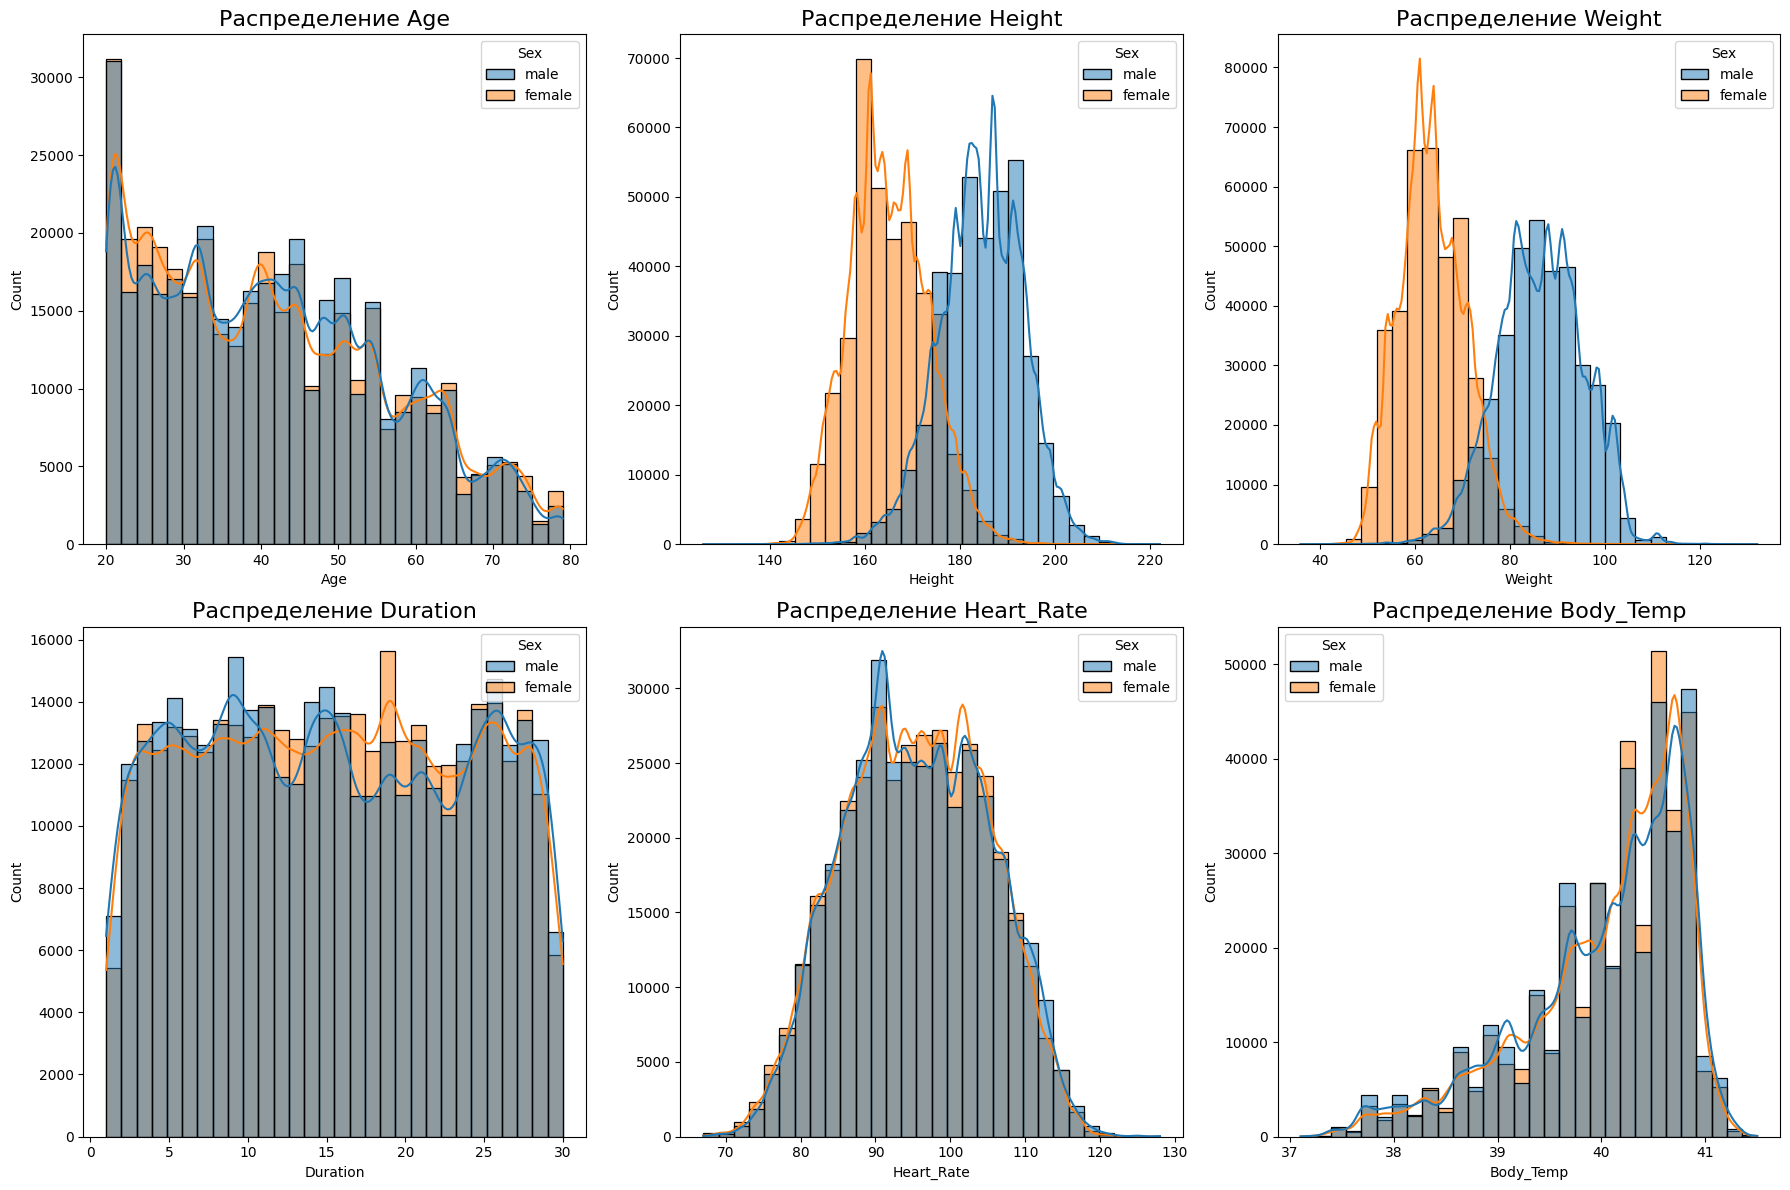

In [15]:
# —Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_cols = num_cols.copy()
numeric_cols.remove(target)

# –°–æ–∑–¥–∞–µ–º grid –≥—Ä–∞—Ñ–∏–∫–æ–≤
n_cols = 3  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='Sex', bins=30, kde=True, alpha=0.5)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}', fontsize=16)
    plt.grid(False)

plt.tight_layout()
plt.show()

–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å —É—á—ë—Ç–æ–º **—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –ø–æ –ø–æ–ª—É**:

---

### üîπ **Age (–í–æ–∑—Ä–∞—Å—Ç)**

* **–Ø–≤–Ω–æ —Å–∫–æ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ —Å—Ç–æ—Ä–æ–Ω—É –º–æ–ª–æ–¥–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞**.
* –í—Å–ø–ª–µ—Å–∫ –Ω–∞ 20 –ª–µ—Ç ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, –±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –º–æ–ª–æ–¥—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∏–ª–∏ —ç—Ç–æ –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É.
* –ü–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ–µ —É–±—ã–≤–∞–Ω–∏–µ —Å –ø–∏–∫–∞–º–∏ –Ω–∞ –∫—Ä—É–≥–ª—ã—Ö –¥–∞—Ç–∞—Ö (30, 40, 50‚Ä¶) ‚Äî **–≤–æ–∑–º–æ–∂–Ω—ã –æ–∫—Ä—É–≥–ª–µ–Ω–∏—è –∏–ª–∏ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –ø—Ä–∏ –≤–≤–æ–¥–µ**.
* –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å—Ö–æ–∂–µ.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª–∏–∑–∞—Ü–∏—é –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å, –Ω–µ—Ç –ª–∏ "–∞—Ä—Ç–µ—Ñ–∞–∫—Ç–æ–≤" (–Ω–∞–ø—Ä–∏–º–µ—Ä, 20 –ª–µ—Ç ‚Äî –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ –º–Ω–æ–≥–æ).

---

### üîπ **Height (–†–æ—Å—Ç)**

* –ú—É–∂—á–∏–Ω—ã (—Å–∏–Ω–∏–µ): –º–∞–∫—Å–∏–º—É–º –æ–∫–æ–ª–æ 178‚Äì180 —Å–º. –®–∏—Ä–æ–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –æ—Ç 160 –¥–æ 200+.
* –ñ–µ–Ω—â–∏–Ω—ã (–æ—Ä–∞–Ω–∂–µ–≤—ã–µ): –º–∞–∫—Å–∏–º—É–º –æ–∫–æ–ª–æ 160‚Äì165 —Å–º, –ª–µ–≤–µ–µ –∏ –∫–æ–º–ø–∞–∫—Ç–Ω–µ–µ.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —á—ë—Ç–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø–æ–ª—É, –∫–∞–∫ –æ–∂–∏–¥–∞–µ—Ç—Å—è. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∞–¥–µ–∫–≤–∞—Ç–Ω—ã, –Ω–æ **–∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ 140 —Å–º –∏ –≤—ã—à–µ 210 —Å–º** ‚Äî —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞–∫ –≤–æ–∑–º–æ–∂–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã.

---

### üîπ **Weight (–í–µ—Å)**

* –ê–Ω–∞–ª–æ–≥–∏—á–Ω–∞—è –∫–∞—Ä—Ç–∏–Ω–∞: –º—É–∂—á–∏–Ω—ã —Ç—è–∂–µ–ª–µ–µ, –∂–µ–Ω—â–∏–Ω—ã –ª–µ–≥—á–µ.
* –¶–µ–Ω—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π: –º—É–∂—á–∏–Ω—ã ‚Äî –æ–∫–æ–ª–æ 80 –∫–≥, –∂–µ–Ω—â–∏–Ω—ã ‚Äî 60 –∫–≥.
* –ù–µ–∫–æ—Ç–æ—Ä–∞—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è: —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å –≤–ø—Ä–∞–≤–æ (–æ—Å–æ–±–µ–Ω–Ω–æ —É –º—É–∂—á–∏–Ω).

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∏–∂–µ 45 –∫–≥ –∏ –≤—ã—à–µ 120 –∫–≥ ‚Äî —Å—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –∫—Ä–∞–π–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–≥–ª—è–¥–∏—Ç —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ.

---

### üîπ **Duration (–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å)**

* –ü–æ—á—Ç–∏ **—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ** –æ—Ç 1 –¥–æ 30.
* –ü–æ–ª –Ω–µ –≤–ª–∏—è–µ—Ç ‚Äî –º—É–∂—Å–∫–∏–µ –∏ –∂–µ–Ω—Å–∫–∏–µ –≥—Ä–∞—Ñ–∏–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —ç—Ç–æ **–∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª** (–≤–æ–∑–º–æ–∂–Ω–æ, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–∫ –∏–ª–∏ —Å–µ–∞–Ω—Å–æ–≤). –ú–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å, –∏–ª–∏ –±–∏–Ω–∏–Ω–≥–æ–≤–∞—Ç–∏—Ç—å.

---

### üîπ **Heart\_Rate (–ü—É–ª—å—Å)**

* –ü—É–ª—å—Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω **–Ω–æ—Ä–º–∞–ª—å–Ω–æ**, —Å –ø–∏–∫–æ–º –æ–∫–æ–ª–æ 90‚Äì100 —É–¥/–º–∏–Ω.
* –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã —Å–Ω–æ–≤–∞ –ø–æ—Ö–æ–∂–∏.
* –í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –≤ 120‚Äì130 —É–¥/–º–∏–Ω ‚Äî **–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã –ø—Ä–∏ –Ω–∞–≥—Ä—É–∑–∫–µ**.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –ú–æ–∂–Ω–æ —Å–æ–∑–¥–∞—Ç—å –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ ¬´–ø—É–ª—å—Å –≤—ã—à–µ 100¬ª –∏–ª–∏ ¬´–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã¬ª –¥–ª—è –º–µ–¥–∏—Ü–∏–Ω—ã/—Ñ–∏—Ç–Ω–µ—Å–∞.

---

### üîπ **Body\_Temp (–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ —Ç–µ–ª–∞)**

* –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ **–æ—Ç 37 –¥–æ 41.5¬∞C** ‚Äî –Ω–µ—Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä—ã.
* –ü–∏–∫ —É 40‚Äì40.5¬∞C ‚Äî –∫—Ä–∞–π–Ω–µ –≤—ã—Å–æ–∫–∞—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, **—á—Ç–æ-—Ç–æ –Ω–µ —Ç–∞–∫**:

  * –ª–∏–±–æ —ç—Ç–æ **—Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –ø–æ—Å–ª–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏** (–µ—Å–ª–∏ –∏–∑–º–µ—Ä–µ–Ω–∏–µ –ø–æ –∫–æ–∂–µ –∏–ª–∏ –ø–æ–¥ –Ω–∞–≥—Ä—É–∑–∫–æ–π),
  * –ª–∏–±–æ **–µ–¥–∏–Ω–∏—Ü—ã –Ω–µ –¶–µ–ª—å—Å–∏–π**, –ª–∏–±–æ **–æ—à–∏–±–∫–∞ —Å–±–æ—Ä–∞**.

üìå *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: —Ç—Ä–µ–±—É–µ—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏. –°—Ä–µ–¥–Ω—è—è —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ —Ç–µ–ª–∞ —á–µ–ª–æ–≤–µ–∫–∞ ‚Äî **36.6‚Äì37.5¬∞C**, –∏ 40¬∞C ‚Äî —ç—Ç–æ —É–∂–µ –∫–ª–∏–Ω–∏—á–µ—Å–∫–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ.

---

### üü© –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:

‚úÖ **–•–æ—Ä–æ—à–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã**: `Age`, `Height`, `Weight`, `Heart_Rate`.

‚ö†Ô∏è **–ü—Ä–æ–≤–µ—Ä–∏—Ç—å:**

* `Body_Temp` ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —à–∫–∞–ª—ã –∏–ª–∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è.

* –°–¥–µ–ª–∞—Ç—å **–±–æ–∫—Å-–ø–ª–æ—Ç—ã** –¥–ª—è `Weight`, `Height`, `Body_Temp`, `Calories` ‚Äî –≤—ã—è–≤–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã.

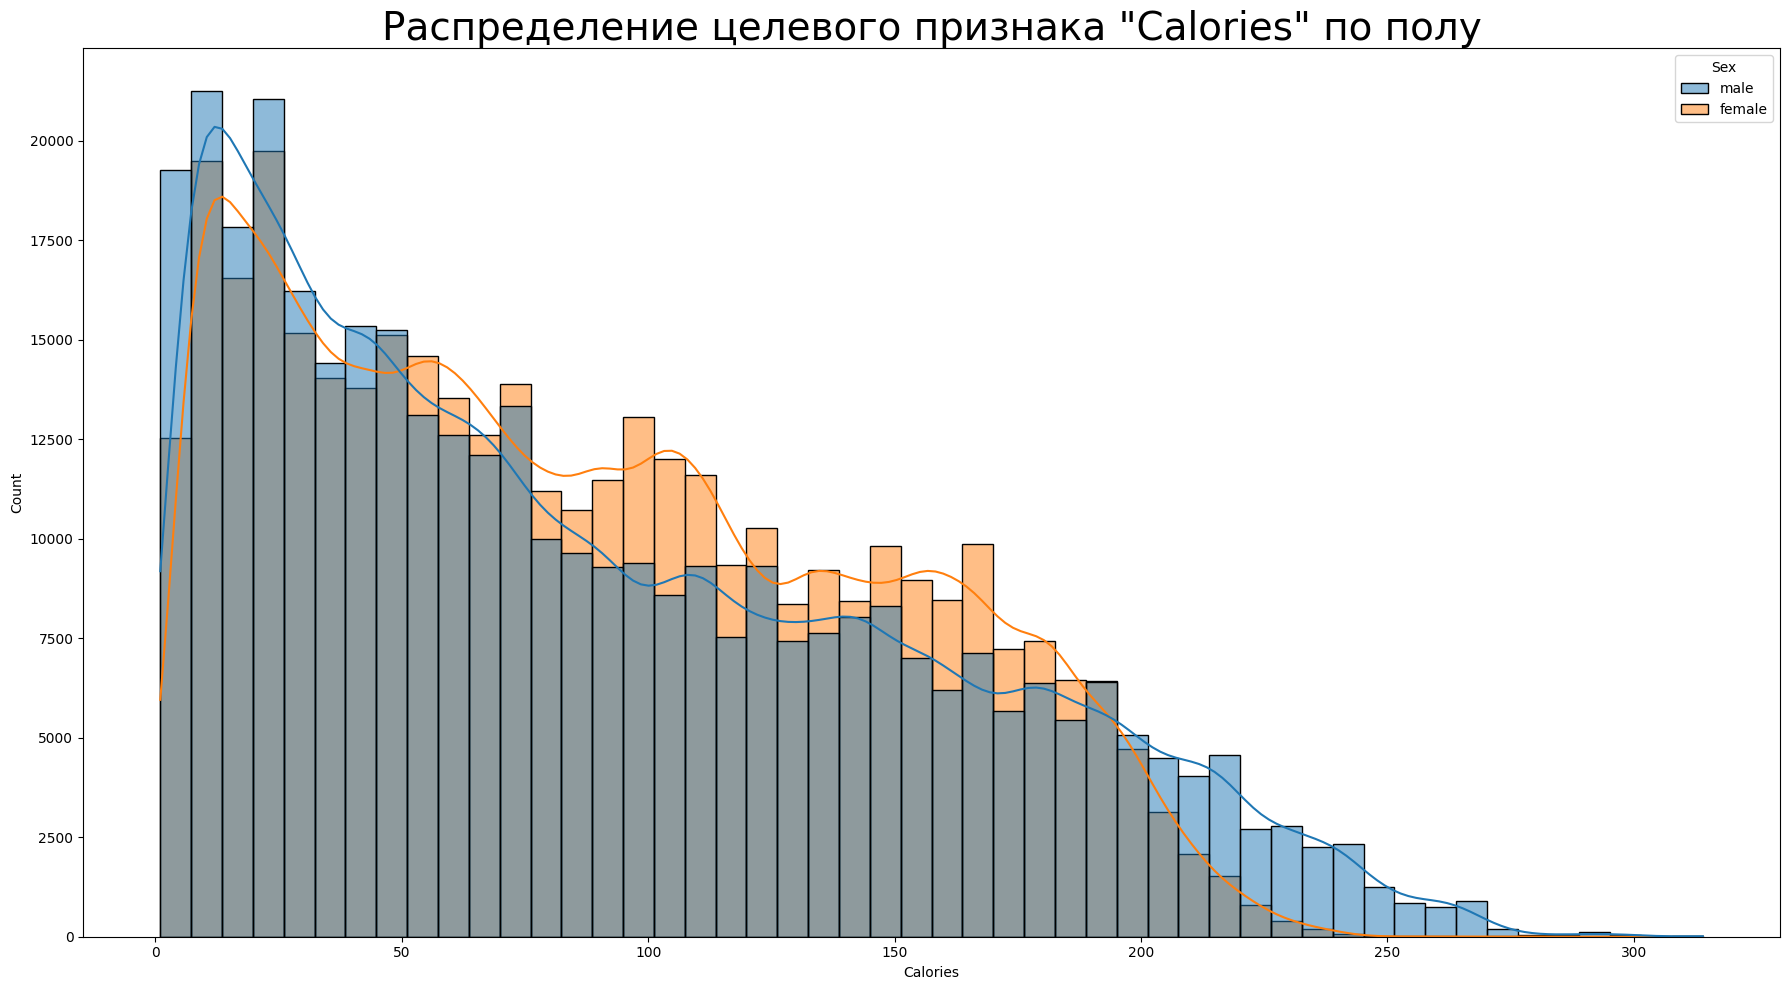

In [16]:
plt.figure(figsize=(18, 10))

sns.histplot(data=df, x=target, hue='Sex', bins=50, kde=True, alpha=0.5)
plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ "{target}" –ø–æ –ø–æ–ª—É', fontsize=28)
plt.grid(False)

plt.tight_layout()
plt.show()

---

## üîç –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ **Calories** (—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è):

* **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —è–≤–Ω–æ —Å–∫–æ—à–µ–Ω–æ –≤–ª–µ–≤–æ** (–∞—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ, —Å –¥–ª–∏–Ω–Ω—ã–º "—Ö–≤–æ—Å—Ç–æ–º" –≤–ø—Ä–∞–≤–æ).
* –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –ª–µ–∂–∏—Ç –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö **0‚Äì150**, –ø–∏–∫ –æ–∫–æ–ª–æ **20‚Äì40 –∫–∫–∞–ª**.
* –ï—Å—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –≤–ø–ª–æ—Ç—å –¥–æ **300+ –∫–∫–∞–ª**, –Ω–æ –æ–Ω–∏ **—Ä–µ–¥–∫–∏–µ** ‚Äî —ç—Ç–æ **–¥–ª–∏–Ω–Ω—ã–π —Ö–≤–æ—Å—Ç**, –≤–æ–∑–º–æ–∂–Ω–æ, –≤—ã–±—Ä–æ—Å—ã.
* –ú—É–∂—á–∏–Ω—ã –≤ —Å—Ä–µ–¥–Ω–µ–º —Å–∂–∏–≥–∞—é—Ç **–±–æ–ª—å—à–µ –∫–∞–ª–æ—Ä–∏–π**, —á–µ–º –∂–µ–Ω—â–∏–Ω—ã:

  * –£ –º—É–∂—á–∏–Ω —Ö–≤–æ—Å—Ç –ø—Ä–∞–≤–µ–µ, –±–æ–ª—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å –∫–∞–ª–æ—Ä–∏—è–º–∏ >200.
  * –£ –∂–µ–Ω—â–∏–Ω –º–∞–∫—Å–∏–º—É–º –±–ª–∏–∂–µ –∫ 80‚Äì120.

---

## üìå –í—ã–≤–æ–¥—ã:

1. **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ**, –≤—ã—Å–æ–∫–∞—è —Å–∫–æ—à–µ–Ω–Ω–æ—Å—Ç—å:

   * –≠—Ç–æ –º–æ–∂–µ—Ç –∑–∞—Ç—Ä—É–¥–Ω–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏—é –µ—Å–ª–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤–∑—è—Ç—å MSE).
   * –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è **–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ**: `log1p(Calories)` ‚Äî —É—Å—Ç—Ä–∞–Ω–∏—Ç –ø–µ—Ä–µ–∫–æ—Å.

2. **–í—ã–±—Ä–æ—Å—ã**:

   * –ó–Ω–∞—á–µ–Ω–∏—è –≤—ã—à–µ **250‚Äì300 –∫–∫–∞–ª** ‚Äî **–∫—Ä–∞–π–Ω–∏–µ –∏ —Ä–µ–¥–∫–∏–µ**, —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å:

     * –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã –ª–∏ –æ–Ω–∏?
     * –Ω–µ —Å—Ç–æ–∏—Ç –ª–∏ –æ–±—Ä–µ–∑–∞—Ç—å/–Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å?

3. **–†–∞–∑–ª–∏—á–∏–µ –ø–æ –ø–æ–ª—É**:

   * –ü–æ–ª –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ‚Äî –º–æ–∂–Ω–æ:

     * –æ–±—É—á–∞—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –º—É–∂—á–∏–Ω –∏ –∂–µ–Ω—â–∏–Ω.

---

## ‚úÖ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:

* –î–æ–±–∞–≤–∏—Ç—å –ª–æ–≥-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—É—é —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é: `Calories_log = np.log1p(Calories)`.
* –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ `Calories_log`, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —Å—Ç–∞–ª–æ –ª–∏ –æ–Ω–æ –±–ª–∏–∂–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.
* –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤—ã–±—Ä–æ—Å—ã: –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å boxplot –∏–ª–∏ –æ–±—Ä–µ–∑–∞—Ç—å `Calories > 300`.

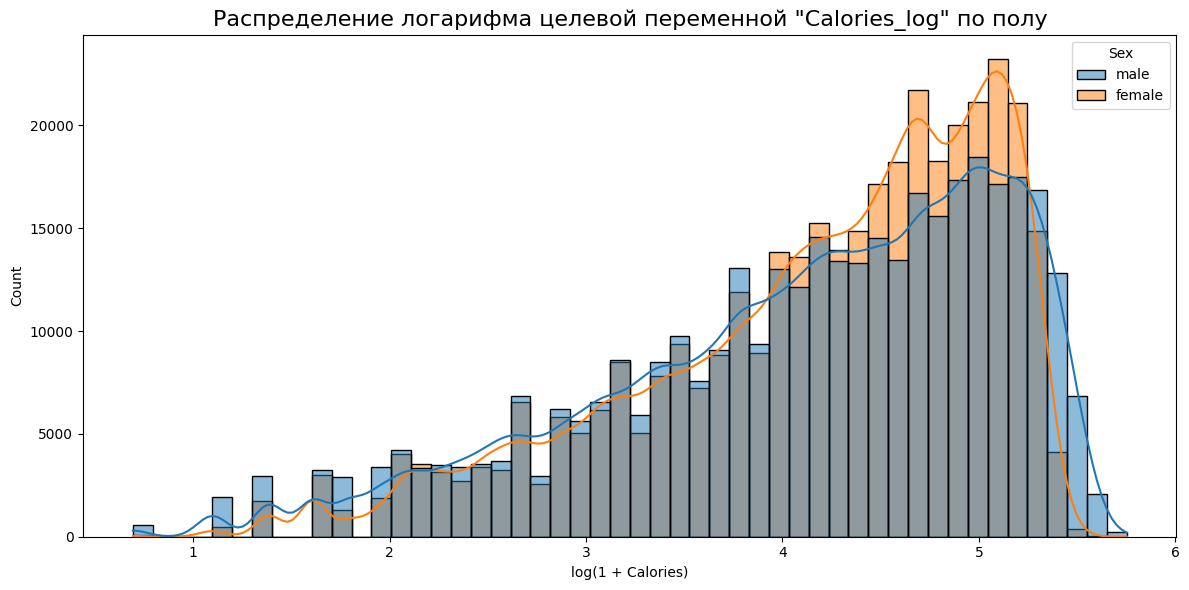

In [17]:
df['Calories_log'] = np.log1p(df['Calories'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Calories_log', hue='Sex', bins=50, kde=True, alpha=0.5)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π "Calories_log" –ø–æ –ø–æ–ª—É', fontsize=16)
plt.xlabel('log(1 + Calories)')
plt.grid(False)
plt.tight_layout()
plt.show()

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ log1p(Calories) –±—ã–ª–æ —É—Å–ø–µ—à–Ω—ã–º: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞–ª–æ –±–æ–ª–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –ø–æ–ª—É —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏—Å—å, –∏ –¥–∞–Ω–Ω—ã–µ —Å—Ç–∞–ª–∏ –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç—å –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ù—É–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `Calories_log = np.log1p(Calories)`



## –ü–æ–∏—Å–∫ –∏ –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤

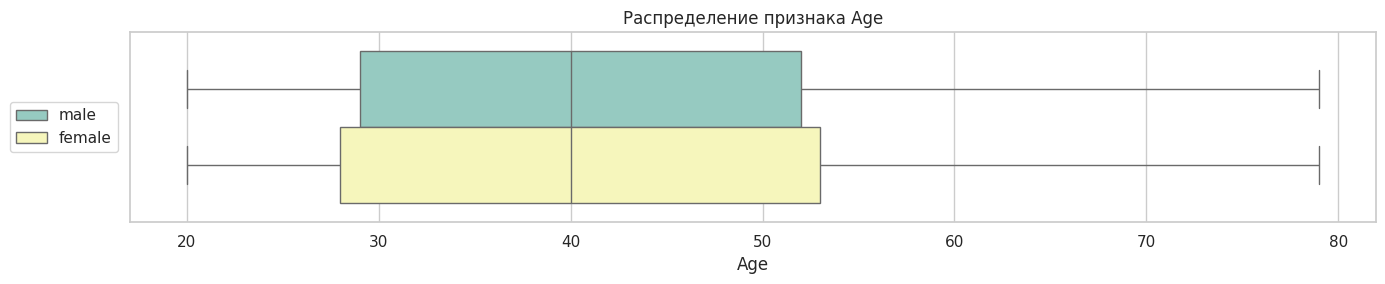

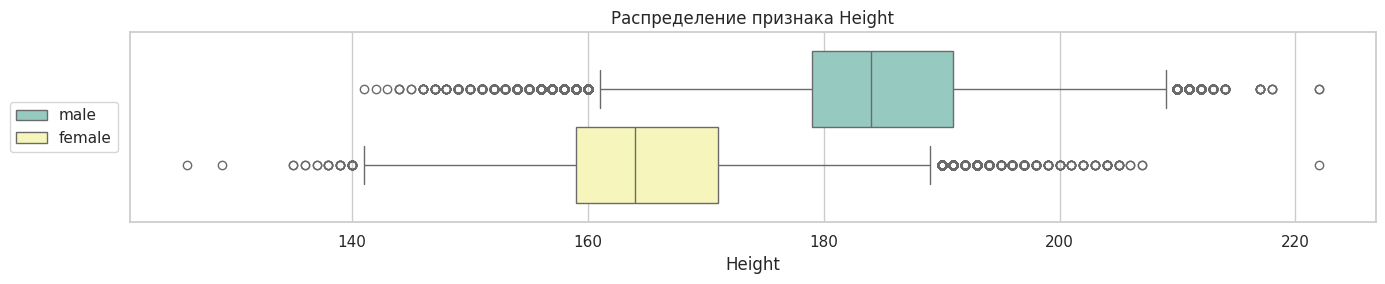

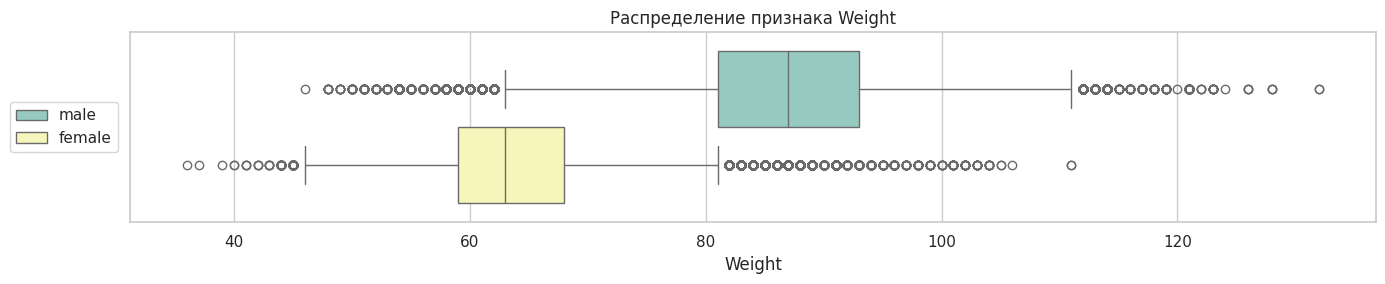

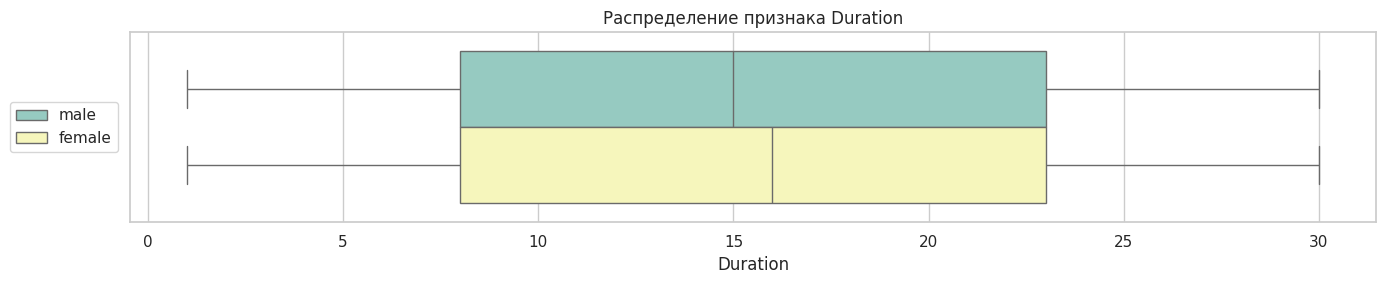

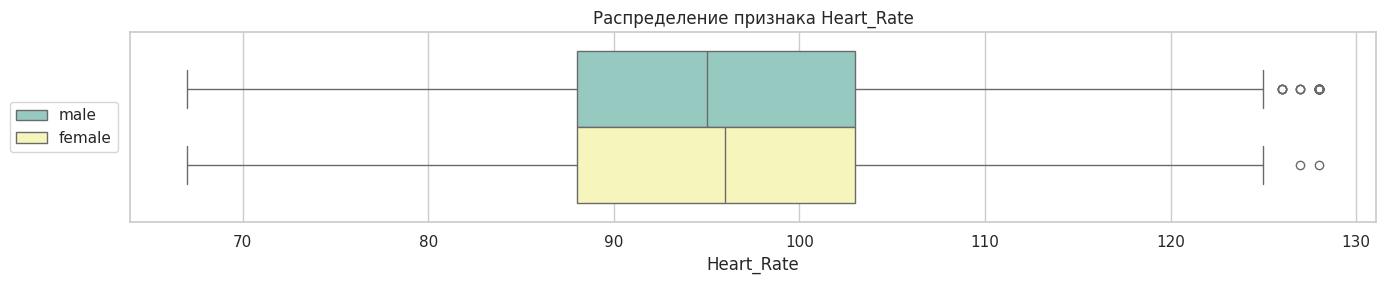

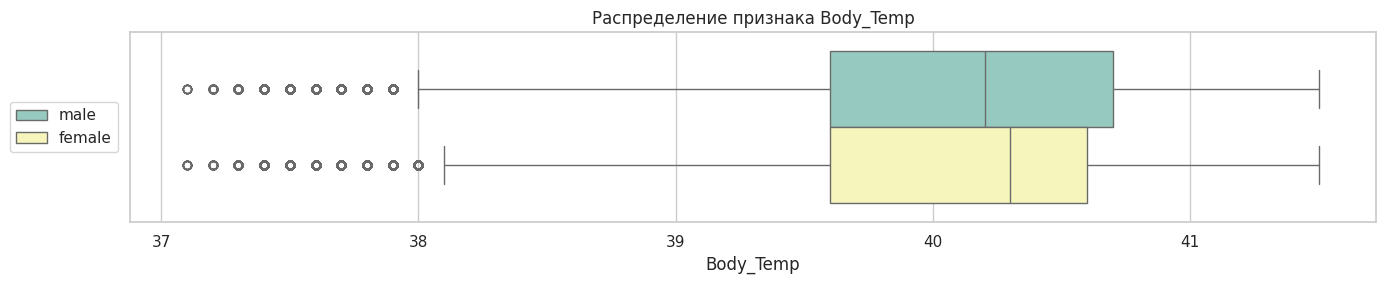

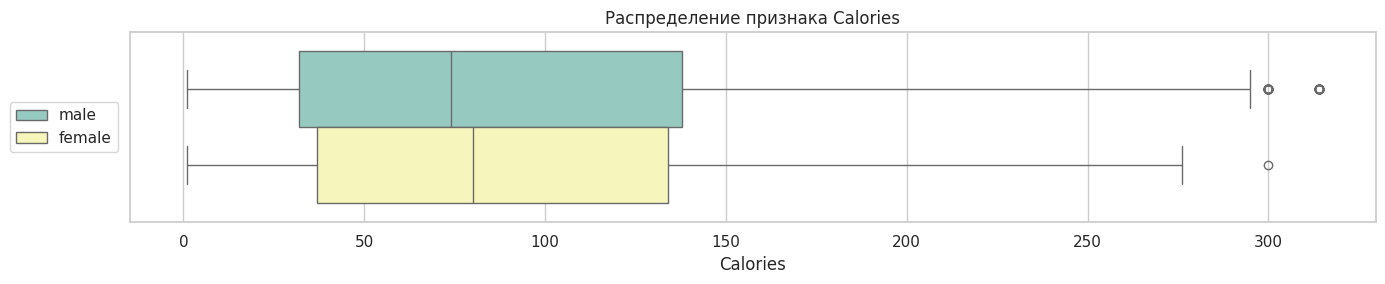

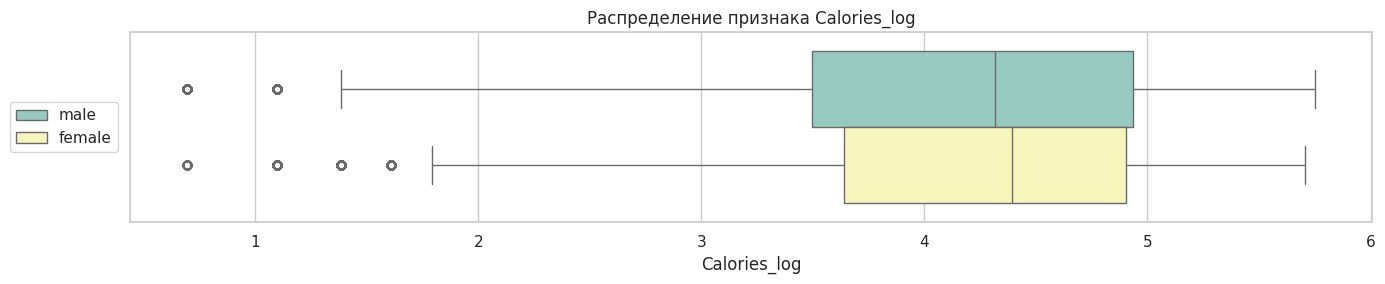

In [18]:
sns.set(style='whitegrid')

for col in num_cols + ['Calories_log']:
    plt.figure(figsize=(14, 3))
    sns.boxplot(data=df, x=col, hue='Sex', palette='Set3', legend=True)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ {col}')
    # –ü–µ—Ä–µ–º–µ—â–∞–µ–º –ª–µ–≥–µ–Ω–¥—É –≤ –ª–µ–≤—É—é —á–∞—Å—Ç—å –∏ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º –ø–æ –≤—ã—Å–æ—Ç–µ
    plt.legend(bbox_to_anchor=(-0.01, 0.5), loc='center right', borderaxespad=0)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –≤—ã–±—Ä–æ—Å—ã –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö Height –∏ Weight. –ú–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç –Ω–∏—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

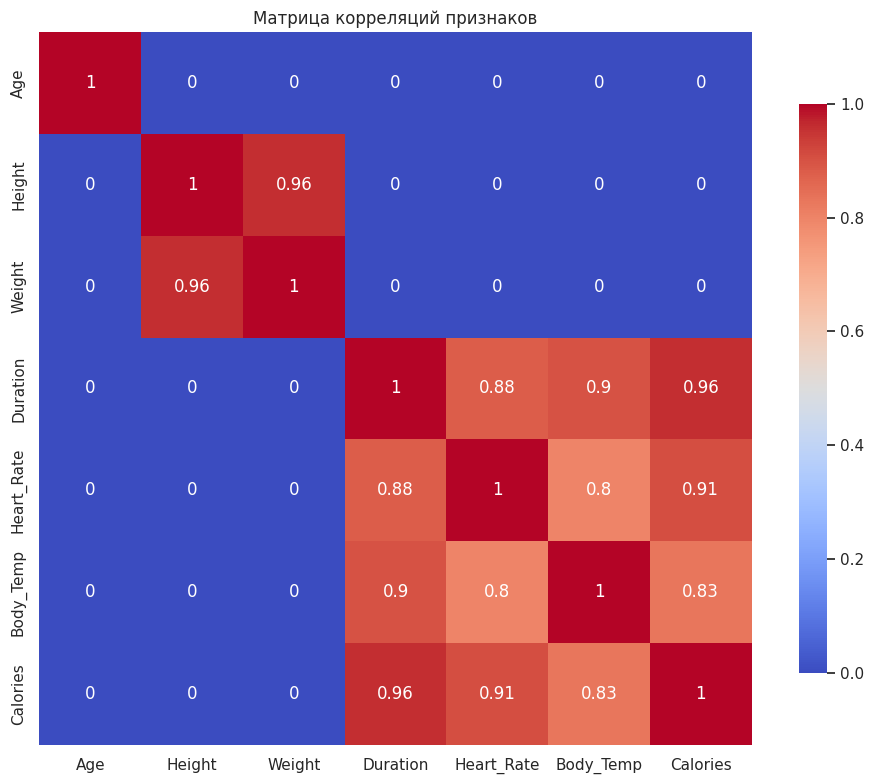

In [19]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –±–µ–∑ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
corr_matrix = np.round(df[num_cols].corr(),2)
# –ó—É–Ω—É–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ –±–æ–ª—å—à–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")
plt.tight_layout()
plt.show()

–£ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ—Å—Ç—å —Å–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Å–æ–±–æ–π.

In [20]:
# –û–±–Ω—É–ª–∏–º –¥–∏–∞–≥–æ–Ω–∞–ª—å, —á—Ç–æ–±—ã –∏—Å–∫–ª—é—á–∏—Ç—å —Å–∞–º–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
corr_matrix_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, 0)

# –ü–æ–ª—É—á–∏–º –ø–∞—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π > 0.9 –∏–ª–∏ < -0.9
high_corr_pairs = (
    corr_matrix_no_diag
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –≤—ã—Å–æ–∫–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
high_corr_pairs = high_corr_pairs[
    high_corr_pairs['Correlation'].abs() > 0.7
].sort_values(by='Feature 1')

# –£–¥–∞–ª–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã (A-B –∏ B-A)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature 1'] < high_corr_pairs['Feature 2']]

high_corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

Feature 1   Feature 2  Correlation
0   Calories    Duration         0.96
1     Height      Weight         0.96
2   Calories  Heart_Rate         0.91
3  Body_Temp    Duration         0.90
4   Duration  Heart_Rate         0.88
5  Body_Temp    Calories         0.83
6  Body_Temp  Heart_Rate         0.80

–¢—Ä–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏–º–µ—é—Ç —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π - —ç—Ç–æ —Ö–æ—Ä–æ—à–æ –¥–ª—è –º–æ–¥–µ–ª–∏. –ù–æ —Ç–∞–∫–∂–µ –ø–æ–ª–æ–≤–∏–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–º–µ–µ—Ç —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É —Å–æ–±–æ–π, –Ω–æ —Ç.–∫. –º—ã –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å "–¥–µ—Ä–µ–≤—è–Ω–Ω—É—é" –º–æ–¥–µ–ª—å –Ω–µ —Å—Ç–æ–∏—Ç –æ–± —ç—Ç–æ–º –±–µ—Å–ø–æ–∫–æ–∏—Ç—å—Å—è.

–î–§ —Å–æ–¥–µ—Ä–∂–∏—Ç 750—Ç—ã—Å —Å—Ç—Ä–æ–∫ –∏ –∑–∞–Ω–∏–º–∞–µ—Ç –≤ –ø–∞–º—è—Ç–∏ 88–ú–ë, —Ç.–µ. –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∏–ª–∏—á–Ω—ã–π –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ –∑–∞–¥—É–º–∞—Ç—å—Å—è –Ω–∞–¥ –æ–ø—Ç–∏–º–∏–∑–∏—Ü–∏–µ–π —Ç–∏–ø–æ–≤, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö. –î–ª—è —ç—Ç–æ–≥–æ –µ—Å—Ç—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è.

In [21]:
df = memory_compression(df)

–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ —Ä–∞–≤–µ–Ω 95.48 –º–±.
–ö–æ–Ω–µ—á–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–∞–º—è—Ç–∏ —Ä–∞–≤–µ–Ω 17.1 –º–±.
–≠–∫–æ–Ω–æ–º–∏—è –ø–∞–º—è—Ç–∏ = 82.1%


# <font color='#11a642' size='6'> **–†–∞–∑–¥–µ–ª–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç**

In [22]:
for seed in (0, 1, 13, 127):
    # –ù–µ –±—É–¥–µ–º –ø–æ–∫–∞ –≤—ã–¥–µ–ª—è—Ç—å —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫, —Ç.–∫. –¥–∞–ª–µ–µ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
    train, valid = train_test_split(df, test_size=0.2, stratify=df['Sex'], random_state=seed)

    print(f'seed={seed:3}, X_train.shape: {train.shape}, X_valid.shape: {valid.shape}')

seed=  0, X_train.shape: (597727, 9), X_valid.shape: (149432, 9)
seed=  1, X_train.shape: (597727, 9), X_valid.shape: (149432, 9)
seed= 13, X_train.shape: (597727, 9), X_valid.shape: (149432, 9)
seed=127, X_train.shape: (597727, 9), X_valid.shape: (149432, 9)


<font color='#11a642' size='5'> –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å:

–î–ª—è —á–µ–≥–æ –Ω—É–∂–µ–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä random_state? –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –µ–≥–æ –∏–∑–º–µ–Ω–∏—Ç—å, —á—Ç–æ-—Ç–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å?
    

–ü–∞—Ä–∞–º–µ—Ç—Ä **`random_state`** –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `train_test_split()` (–∏ –¥—Ä—É–≥–∏—Ö –º–µ—Ç–æ–¥–∞—Ö –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è) –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç **—Å–ª—É—á–∞–π–Ω–æ—Å—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö**. –í–æ—Ç —á—Ç–æ –Ω—É–∂–Ω–æ –æ –Ω—ë–º –∑–Ω–∞—Ç—å:

---

### **1. –î–ª—è —á–µ–≥–æ –Ω—É–∂–µ–Ω `random_state`?**
- **–§–∏–∫—Å–∏—Ä—É–µ—Ç —Å–ª—É—á–∞–π–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ** –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏.  
- –ì–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –ø—Ä–∏ –∫–∞–∂–¥–æ–º –∑–∞–ø—É—Å–∫–µ –∫–æ–¥–∞ —Å –æ–¥–Ω–∏–º –∏ —Ç–µ–º –∂–µ `random_state` —Ä–∞–∑–±–∏–µ–Ω–∏–µ –±—É–¥–µ—Ç **–∏–¥–µ–Ω—Ç–∏—á–Ω—ã–º**.  
- –ü–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–µ–ª–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã **–≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–º–∏** (—á—Ç–æ–±—ã –¥—Ä—É–≥–∏–µ –º–æ–≥–ª–∏ –ø–æ–≤—Ç–æ—Ä–∏—Ç—å –Ω–∞—à —Ä–µ–∑—É–ª—å—Ç–∞—Ç).

---

### **2. –ß—Ç–æ –ø—Ä–æ–∏–∑–æ–π–¥—ë—Ç, –µ—Å–ª–∏ –µ–≥–æ –∏–∑–º–µ–Ω–∏—Ç—å?**
- **–†–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è `random_state` ‚Üí —Ä–∞–∑–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö** (–¥—Ä—É–≥–∏–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–ø–∞–¥—É—Ç –≤ `X_train` –∏ `X_valid`).  
- **–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –º–æ–∂–µ—Ç –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—è—Ç—å—Å—è**, —Ç–∞–∫ –∫–∞–∫ –æ–±—É—á–µ–Ω–∏–µ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö.  

---

### **3. –ß—Ç–æ –±—É–¥–µ—Ç, –µ—Å–ª–∏ –Ω–µ –∑–∞–¥–∞—Ç—å `random_state`?**
- –ü—Ä–∏ –∫–∞–∂–¥–æ–º –∑–∞–ø—É—Å–∫–µ –∫–æ–¥–∞ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –±—É–¥–µ—Ç **—Å–ª—É—á–∞–π–Ω—ã–º** (–Ω–µ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–º).  
- –≠—Ç–æ –º–æ–∂–µ—Ç –∑–∞—Ç—Ä—É–¥–Ω–∏—Ç—å –æ—Ç–ª–∞–¥–∫—É –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π.

---

### **4. –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é**
- **–î–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞** –Ω—É–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å `random_state`.  
- **–í –ø—Ä–æ–¥–∞–∫—à–µ–Ω–µ** –∏–Ω–æ–≥–¥–∞ –µ–≥–æ —É–±–∏—Ä–∞—é—Ç, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫ —Ä–∞–∑–Ω—ã–º —Ä–∞–∑–±–∏–µ–Ω–∏—è–º.  

---

### **–í—ã–≤–æ–¥:**  
–ï—Å–ª–∏ –º—ã –∏–∑–º–µ–Ω–∏–º `random_state`, —Å–æ—Å—Ç–∞–≤ `X_train`/`X_valid` –∏–∑–º–µ–Ω–∏—Ç—Å—è, –Ω–æ –æ–±—â–µ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `test_size=0.2`) –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –ø—Ä–µ–∂–Ω–∏–º. –ó–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º random_state, –µ—Å–ª–∏ –Ω–∞–º –Ω—É–∂–Ω–∞ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å!    

In [23]:
train, valid = train_test_split(df, test_size=0.2, stratify=df['Sex'], random_state=SEED)

# <font color='#11a642' size='6'> **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ –æ–±—É—á–µ–Ω–∏—é**


1. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å
2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å
3. –°—Ç–æ–∏—Ç –ª–∏ –¥–µ–ª–∞—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö?



In [24]:
# 1. –í—ã—à–µ –±—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ, —á—Ç–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç
print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:", df.isnull().sum().sum())

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: 0


In [25]:
# 2. –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: —Ç.–∫. —É –Ω–∞—Å –æ–¥–Ω–æ –ø–æ–ª–µ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º "Sex",
# –ø—Ä–∏–Ω–∏–º–∞—é—â–µ–µ 2 –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–µ –±—É–¥–µ–º –º—É–¥—Ä–∏—Ç—å -> –Ω–∞–º —Ö–≤–∞—Ç–∏—Ç –ø–∞–Ω–¥–∞—Å–∞

map_dict = {'male': 1, 'female': 0}
train["Sex"] = train["Sex"].map(map_dict).astype(np.int8)
valid["Sex"] = valid["Sex"].map(map_dict).astype(np.int8)

#### –î–ª—è –¥–µ—Ä–µ–≤—è–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è:

–¢.–∫. DecisionTreeRegressor (–∫–∞–∫ –∏ –ª—é–±—ã–µ –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π) –Ω–µ –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è—Ö –∏–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞—Ö, –∞ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –∂—ë—Å—Ç–∫–∏–º–∏ –ø–æ—Ä–æ–≥–∞–º–∏ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:

- –û–Ω –ø—Ä–æ—Å—Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –ø–æ—Ä–æ–≥–∏, –ø–æ –∫–æ—Ç–æ—Ä—ã–º —Ä–∞–∑–±–∏–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫—É –Ω–∞ –ø–æ–¥–¥–µ—Ä–µ–≤—å—è—Ö.
- –ü–æ—ç—Ç–æ–º—É –º–∞—Å—à—Ç–∞–± –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ ‚Äî –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0, 1] –∏ [0, 1000] –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç—Å—è –æ–¥–∏–Ω–∞–∫–æ–≤–æ.

# <font color='#11a642' size='6'> **–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π**

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞ –±–µ–∑ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π –Ω–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã


In [26]:
model_columns = numeric_cols + cat_cols

params = {}

dt1, metrics_df, _ = train_valid_model(1, params, train, valid, model_columns, target)

### <font color='#11a642' size='4'> –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞  –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞ –±–µ–∑ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π –Ω–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã


In [27]:
metrics_df.round(4)

Metric  Train1   Valid1   Diff1,%
0    mse  0.0376  26.8350  71178.27
1   rmse  0.1940   5.1802   2569.80
2    mae  0.0143   3.1242  21763.21
3   mape  0.0002   0.0530  22670.23
4     r2  1.0000   0.9931     -0.69
5  rmsle  0.0035   0.0874   2433.41

## <font color='#11a642' size='5'> –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Å –ø–æ–∏—Å–∫–æ–º –Ω–∞–∏–ª—É—á—à–∏—Ö –≥–∏–ø–µ—Ä–∞–ø–∞—Ä–º–µ—Ç—Ä–æ–≤


–î–ª—è –ø–æ–∏—Å–∫–∞ –Ω–∞–∏–ª—É—á—à–∏—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ:
- `GridSearchCV` –∏–ª–∏ `RandomizedSearchCV`
- –ü—Ä–∏–º–µ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:

```python
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
```

### GridSearchCV

In [28]:
# –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å GridSearchCV

use_grid_search_cv = False


In [29]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º MSE –∫–∞–∫ –º–µ—Ç—Ä–∏–∫—É
scorer = make_scorer(mean_squared_error, greater_is_better=False)


X_train, y_train = train[model_columns], train[target]
X_valid, y_valid = valid[model_columns], valid[target]

In [30]:
%%time
param_grid = {
    'max_depth': [8, 9, 10, 11, 12],
    'min_samples_split': [3, 5, 10, 20, 30],
    'min_samples_leaf': [3, 5, 10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.8, 1],
    'max_leaf_nodes': [100, 200, 500, 1000, None],
}

if use_grid_search_cv:
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è GridSearchCV
    dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=127),
                           param_grid=param_grid,
                           cv=3,  # –£–º–µ–Ω—å—à–µ–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ–ª–¥–æ–≤ –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏
                           scoring=scorer,
                           n_jobs=-1,  # –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö —è–¥–µ—Ä –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–∞
                           verbose=2)

    # –û–±—É—á–µ–Ω–∏–µ —Å –ø–æ–∏—Å–∫–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    dt_grid.fit(X_train, y_train)

    # –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    grid_best_params = dt_grid.best_params_
    print("–õ—É—á—à–∞—è MSE:", -dt_grid.best_score_)

else:
    grid_best_params = {'max_depth': 12,
                        'max_features': 0.8,
                        'max_leaf_nodes': None,
                        'min_samples_leaf': 5,
                        'min_samples_split': 30,
                        }

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", grid_best_params)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'max_depth': 12, 'max_features': 0.8, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 30}
CPU times: user 168 ¬µs, sys: 0 ns, total: 168 ¬µs
Wall time: 153 ¬µs


### RandomizedSearchCV

In [31]:
# –ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å RandomizedSearchCV

use_random_search_cv = False


In [32]:
%%time
param_dist = {
    'max_depth': list(range(3, 13)),
    'min_samples_split': list(range(3, 30, 2)),
    'min_samples_leaf': list(range(2, 31, 2)),
    'max_features': ['sqrt', 'log2', 0.8, 1],
    'max_leaf_nodes': list(range(100, 1001, 100))
}

if use_random_search_cv:
    dt_random = RandomizedSearchCV(DecisionTreeRegressor(random_state=127),
                                   param_distributions=param_dist,
                                   n_iter=2500,  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π
                                   cv=3,
                                   scoring=scorer,
                                   n_jobs=-1,
                                   random_state=127,
                                   verbose=2)

    # –û–±—É—á–µ–Ω–∏–µ —Å –ø–æ–∏—Å–∫–æ–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
    dt_random.fit(X_train, y_train)


    # –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    rcv_best_params = dt_random.best_params_
    print("–õ—É—á—à–∞—è MSE:", -dt_random.best_score_)

else:
    rcv_best_params = {'max_depth': 12,
                       'max_features': 0.8,
                       'max_leaf_nodes': 1000,
                       'min_samples_leaf': 20,
                       'min_samples_split': 17,
                       }


print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", rcv_best_params)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'max_depth': 12, 'max_features': 0.8, 'max_leaf_nodes': 1000, 'min_samples_leaf': 20, 'min_samples_split': 17}
CPU times: user 647 ¬µs, sys: 0 ns, total: 647 ¬µs
Wall time: 579 ¬µs


### <font color='#11a642' size='4'> –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞  –¥–µ—Ä–µ–≤–∞ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏


In [33]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –æ—Ç GridSearchCV

dt2, metrics2, fi2 = train_valid_model(2, grid_best_params, train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics2.drop(columns=['Metric'])], axis=1)

In [34]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –æ—Ç RandomizedSearchCV

dt3, metrics3, fi3 = train_valid_model(3, rcv_best_params, train, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics3.drop(columns=['Metric'])], axis=1)

In [35]:
metrics_df.round(4)

Metric  Train1   Valid1   Diff1,%   Train2   Valid2  Diff2,%   Train3  \
0    mse  0.0376  26.8350  71178.27  20.8422  23.3746    12.15  29.3868   
1   rmse  0.1940   5.1802   2569.80   4.5653   4.8347     5.90   5.4210   
2    mae  0.0143   3.1242  21763.21   2.9847   3.1125     4.28   3.6836   
3   mape  0.0002   0.0530  22670.23   0.0492   0.0512     4.07   0.0696   
4     r2  1.0000   0.9931     -0.69   0.9947   0.9940    -0.07   0.9925   
5  rmsle  0.0035   0.0874   2433.41   0.0719   0.0754     4.91   0.1020   

    Valid3  Diff3,%  
0  30.5408     3.93  
1   5.5264     1.94  
2   3.7425     1.60  
3   0.0705     1.31  
4   0.9921    -0.03  
5   0.1031     1.02

In [36]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º

find_best_model(metrics_df)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (23.3746)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (4.8347)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (3.1125)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (0.0512)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (0.9940)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 (0.0754)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid2 –Ω–∞ 6 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


–ü—Ä–∏ –≤—ã–±–æ—Ä–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –∏–∑ —Ç—Ä—ë—Ö –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å–ª–µ–¥—É–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª—é—á–µ–≤—ã—Ö –∞—Å–ø–µ–∫—Ç–æ–≤:

### 1. **–ò—Å–∫–ª—é—á–∏–º —è–≤–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏**
- **–ú–æ–¥–µ–ª—å 1** –∏–º–µ–µ—Ç –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∏—á–µ—Å–∫–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ:
  - `Diff1 (%)` –≤ –¥–µ—Å—è—Ç–∫–∏ —Ç—ã—Å—è—á –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –¥–ª—è MSE/MAE
  - –û—à–∏–±–∫–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ –±–ª–∏–∑–∫–∏ –∫ –Ω—É–ª—é (`mse=0.0376`), –∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≤ —Å–æ—Ç–Ω–∏ —Ä–∞–∑ —Ö—É–∂–µ
  - **–í—ã–≤–æ–¥**: –ú–æ–¥–µ–ª—å 1 —Å—Ä–∞–∑—É –∏—Å–∫–ª—é—á–∞–µ–º

### 2. **–°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª–∏ 2 –∏ 3 –ø–æ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º**
| Metric   | Valid2      | Valid3      | –õ—É—á—à–µ |
|----------|------------|------------|-------|
| **MSE**  | 23.3746     | 30.5408	     | 2     |
| **MAE**  | 3.1125      | 3.7425     | 2     |
| **MAPE** | 0.0512     | 0.0705     | 2     |
| **R¬≤**   | 0.9940     | 0.9925     | 2     |
| **RMSLE**| 0.0754    | 0.1031     | 2     |

**–í—ã–≤–æ–¥**: –ü–æ –≤—Å–µ–º –º–µ—Ç—Ä–∏–∫–∞–º **–ú–æ–¥–µ–ª—å 2** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.

### 3. **–ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π**
- **–†–∞–∑–Ω–∏—Ü–∞ train/valid (—Å—Ç–æ–ª–±—Ü—ã Diff2/Diff3)**:
  - –£ –ú–æ–¥–µ–ª–∏ 2: 4-12%
  - –£ –ú–æ–¥–µ–ª–∏ 3:  < 5%
  
–•–æ—Ç—è –ú–æ–¥–µ–ª—å 3 –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–∞, –µ—ë –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ —Ö—É–∂–µ. –ü—Ä–∏–µ–º–ª–µ–º–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –≤ 12% —É –ú–æ–¥–µ–ª–∏ 2 –Ω–µ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞–µ—Ç –µ—ë –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ.

### 4. **–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏**
- **R¬≤-–±–ª–∏–∑–æ—Å—Ç—å –∫ 1**: –£ –ú–æ–¥–µ–ª–∏ 2 –≤—ã—à–µ (0.9940 vs 0.9925)
- **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –æ—à–∏–±–æ–∫**:
  - MAE~3.1 –æ–∑–Ω–∞—á–∞–µ—Ç —Å—Ä–µ–¥–Ω—é—é –æ—à–∏–±–∫—É –≤ 3.1 –µ–¥–∏–Ω–∏—Ü —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
  - MAPE~5.12% - —Å—Ä–µ–¥–Ω—è—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –ø—Ä–∏–µ–º–ª–µ–º–∞

### –ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–±–æ—Ä: **–ú–æ–¥–µ–ª—å 2**

### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è:
1. **–ê–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤**: –í—ã—Å–æ–∫–∏–π MAPE –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –ø—Ä–æ–±–ª–µ–º–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è
2. **–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—à–∏–±–æ–∫**:

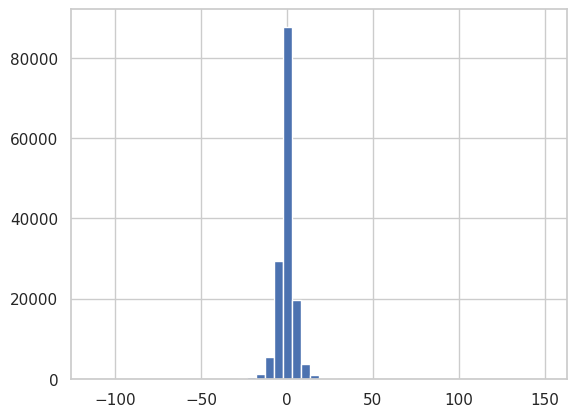

In [37]:
residuals = y_valid - dt2.predict(X_valid)
plt.hist(residuals, bins=50)
plt.show;

–û—à–∏–±–∫–∏ –≤ –æ–¥–Ω–æ–≤–Ω–æ–º —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω—ã –æ–∫–æ–ª–æ –Ω—É–ª—è.

### –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤

In [38]:
# –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏
outlier_cols = ['Height', 'Weight']

# –¢—É—Ç –±—É–¥–µ–º —Ö—Ä–∞–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç
results = []

for sex in (0, 1):
    # –í—ã–±–∏—Ä–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø–æ–ª–∞
    X_sex = train[train['Sex'] == sex].copy()

    # –í—ã—á–∏—Å–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã —Ç–æ–ª—å–∫–æ –¥–ª—è —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
    outlier_flags = calculate_outliers(X_sex[outlier_cols], q_range=2)

    # –§–∏–ª—å—Ç—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã
    X_filtered = X_sex[~outlier_flags.any(axis=1)]
    results.append(X_filtered)

    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    print(f"–ü–æ–ª {sex}:")
    print(f"  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: {len(X_sex)}")
    print(f"  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: {len(X_filtered)}")
    print(f"  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {len(X_sex) - len(X_filtered)}")
    print(f"  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: {100 * outlier_flags.any(axis=1).mean():.2f}%\n")

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
train_out = pd.concat(results)

# –£—á–∏–º –º–æ–¥–µ–ª—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –æ—Ç GridSearchCV
dt4, metrics4, fi4 = train_valid_model(4, grid_best_params, train_out, valid, model_columns, target)

metrics_df = pd.concat([metrics_df, metrics4.drop(columns=['Metric'])], axis=1)

–ü–æ–ª 0:
  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: 299432
  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: 298571
  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 861
  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: 0.29%

–ü–æ–ª 1:
  –ë—ã–ª–æ —Å—Ç—Ä–æ–∫: 298295
  –°—Ç–∞–ª–æ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: 297833
  –£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 462
  –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤: 0.15%



In [39]:
metrics_df.round(4)

Metric  Train1   Valid1   Diff1,%   Train2   Valid2  Diff2,%   Train3  \
0    mse  0.0376  26.8350  71178.27  20.8422  23.3746    12.15  29.3868   
1   rmse  0.1940   5.1802   2569.80   4.5653   4.8347     5.90   5.4210   
2    mae  0.0143   3.1242  21763.21   2.9847   3.1125     4.28   3.6836   
3   mape  0.0002   0.0530  22670.23   0.0492   0.0512     4.07   0.0696   
4     r2  1.0000   0.9931     -0.69   0.9947   0.9940    -0.07   0.9925   
5  rmsle  0.0035   0.0874   2433.41   0.0719   0.0754     4.91   0.1020   

    Valid3  Diff3,%   Train4   Valid4  Diff4,%  
0  30.5408     3.93  19.9509  22.6948    13.75  
1   5.5264     1.94   4.4666   4.7639     6.66  
2   3.7425     1.60   2.9180   3.0582     4.80  
3   0.0705     1.31   0.0484   0.0505     4.19  
4   0.9921    -0.03   0.9949   0.9942    -0.07  
5   0.1031     1.02   0.0711   0.0746     5.00

In [40]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º

find_best_model(metrics_df)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (22.6948)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (4.7639)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (3.0582)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (0.0505)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (0.9942)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (0.0746)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 –Ω–∞ 6 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


–ù–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å—Ä–∞–≤–Ω–∏–º **–ú–æ–¥–µ–ª—å 2** –∏ **–ú–æ–¥–µ–ª—å 4** (—Å —É–¥–∞–ª–µ–Ω–∏–µ–º –≤—ã–±—Ä–æ—Å–æ–≤):

---

### **–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏**
---

| Metric    | Valid2  | Valid4  | –£–ª—É—á—à–µ–Ω–∏–µ  |
| --------- | ------- | ------- | ---------- |
| **MSE**   | 23.3746 | 22.6948 | **+2.91%** |
| **RMSE**  | 4.8347  | 4.7639  | **+1.46%** |
| **MAE**   | 3.1125  | 3.0582  | **+1.75%** |
| **MAPE**  | 0.0512  | 0.0505  | **+1.37%** |
| **R¬≤**    | 0.9940  | 0.9942  | **+0.02%** |
| **RMSLE** | 0.0754  | 0.0746  | **+1.06%** |

---

üìå **–í—ã–≤–æ–¥**:
–ú–æ–¥–µ–ª—å 4 –ø–æ–∫–∞–∑–∞–ª–∞ **—É–º–µ—Ä–µ–Ω–Ω–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ** –ø–æ –≤—Å–µ–º –º–µ—Ç—Ä–∏–∫–∞–º –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ú–æ–¥–µ–ª—å—é 2. –û—Å–æ–±–µ–Ω–Ω–æ –∑–∞–º–µ—Ç–µ–Ω –ø—Ä–æ–≥—Ä–µ—Å—Å –≤ MSE –∏ MAE. –£–ª—É—á—à–µ–Ω–∏—è –Ω–µ —Ä–∞–¥–∏–∫–∞–ª—å–Ω—ã–µ, –Ω–æ **—Å—Ç–∞–±–∏–ª—å–Ω—ã–µ –∏ –≤–æ –≤—Å–µ—Ö –∞—Å–ø–µ–∫—Ç–∞—Ö**.

---

### üîé –í—ã–≤–æ–¥:

* **–ú–æ–¥–µ–ª—å 4** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç **—É–ª—É—á—à–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º –º–µ—Ç—Ä–∏–∫–∞–º –≤–∞–ª–∏–¥–∞—Ü–∏–∏** (–ø—É—Å—Ç—å –∏ —É–º–µ—Ä–µ–Ω–Ω–æ–µ).
* –ü—Ä–∏ —ç—Ç–æ–º **—Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É train –∏ valid (Diff)** —É –Ω–µ—ë –Ω–µ–º–Ω–æ–≥–æ –≤—ã—à–µ, —á–µ–º —É –ú–æ–¥–µ–ª–∏ 2, –Ω–æ –≤—Å—ë –µ—â—ë **–≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã** (–º–∞–∫—Å–∏–º—É–º ‚Äî 13.75% –ø–æ MSE).
* –ó–Ω–∞—á–µ–Ω–∏—è R¬≤ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—ã –∏ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∏.

### ‚úÖ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è:

‚úÖ –í—ã–±–∏—Ä–∞–µ–º **–ú–æ–¥–µ–ª—å 4** –∫–∞–∫ –ª—É—á—à—É—é:

* –õ—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –æ—à–∏–±–∫–∞–º–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏.
* –ü–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω–æ—Å—Ç—å ‚Äî **–Ω–µ –∫—Ä–∏—Ç–∏—á–Ω–∞—è**, —á—É—Ç—å –≤—ã—à–µ, –Ω–æ –¥–æ–ø—É—Å—Ç–∏–º–∞—è.
* –î–∞—ë—Ç –Ω–∞–∏–±–æ–ª–µ–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ **–∫–∞—á–µ—Å—Ç–≤–∞** –∏ **–æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏**.

### –ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [41]:
dt5, metrics5, fi5 = train_valid_model(5, grid_best_params, train_out, valid, model_columns,
                                       target, target_log=True)

metrics_df = pd.concat([metrics_df, metrics5], axis=1)

metrics_45 = pd.concat([metrics4, metrics5.drop(columns=['Metric'])], axis=1)
metrics_45.round(4)

Metric   Train4   Valid4  Diff4,%   Train5   Valid5  Diff5,%
0    mse  19.9509  22.6948    13.75  23.9019  26.2411     9.79
1   rmse   4.4666   4.7639     6.66   4.8890   5.1226     4.78
2    mae   2.9180   3.0582     4.80   3.0948   3.2116     3.77
3   mape   0.0484   0.0505     4.19   0.0466   0.0490     5.17
4     r2   0.9949   0.9942    -0.07   0.9939   0.9932    -0.06
5  rmsle   0.0711   0.0746     5.00   0.0674   0.0724     7.31

In [42]:
# –ü–æ–∏—Å–∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º

find_best_model(metrics_45)

–ú–µ—Ç—Ä–∏–∫–∞: mse   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (22.6948)
–ú–µ—Ç—Ä–∏–∫–∞: rmse  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (4.7639)
–ú–µ—Ç—Ä–∏–∫–∞: mae   --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (3.0582)
–ú–µ—Ç—Ä–∏–∫–∞: mape  --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid5 (0.0490)
–ú–µ—Ç—Ä–∏–∫–∞: r2    --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 (0.9942)
–ú–µ—Ç—Ä–∏–∫–∞: rmsle --> –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid5 (0.0724)

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Valid4 –Ω–∞ 4 –º–µ—Ç—Ä–∏–∫–∞—Ö –∏–∑ 6


### üìä **–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ (–º–æ–¥–µ–ª—å 4 vs –º–æ–¥–µ–ª—å 5)**

| Metric    | Valid4  | Valid5  | –ò–∑–º–µ–Ω–µ–Ω–∏–µ     | –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è                            |
| --------- | ------- | ------- | ------------- | ---------------------------------------- |
| **MSE**   | 22.6948 | 26.2411 | ‚ñæ **+15.64%** | –£—Ö—É–¥—à–µ–Ω–∏–µ (–≤–∞–∂–Ω–æ –¥–ª—è –±–æ–ª—å—à–∏—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π) |
| **RMSE**  | 4.7639  | 5.1226  | ‚ñæ **+7.52%**  | –£–º–µ—Ä–µ–Ω–Ω–æ–µ —É—Ö—É–¥—à–µ–Ω–∏–µ                      |
| **MAE**   | 3.0582  | 3.2116  | ‚ñæ **+5.01%**  | –£—Ö—É–¥—à–µ–Ω–∏–µ                                |
| **MAPE**  | 5.05%   | 4.90%   | ‚ñ≤ **‚àí2.97%**  | –õ—ë–≥–∫–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ                         |
| **R¬≤**    | 0.9942  | 0.9932  | ‚ñæ **‚àí0.10%**  | –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —É—Ö—É–¥—à–µ–Ω–∏–µ                 |
| **RMSLE** | 0.0746  | 0.0724  | ‚ñ≤ **‚àí2.95%**  | –õ—ë–≥–∫–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ                         |

---

### üß† **–ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã**

#### 1. **–í–ª–∏—è–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è**

* **–£–ª—É—á—à–µ–Ω–∏–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è** –ø–æ:

  * **MAPE** (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞): –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ —É–º–µ–Ω—å—à–∞–µ—Ç –≤–ª–∏—è–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
  * **RMSLE** (–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞): –ª–æ–≥–∏—á–Ω–æ, —Ç.–∫. –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–µ–ª–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –±–ª–∏–∂–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é
* **–£—Ö—É–¥—à–µ–Ω–∏–µ –ø–æ –∞–±—Å–æ–ª—é—Ç–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º** (MSE, RMSE, MAE): –ª–æ–≥–∞—Ä–∏—Ñ–º ¬´—Å–∂–∏–º–∞–µ—Ç¬ª –º–∞—Å—à—Ç–∞–± –∏ —É—Ö—É–¥—à–∞–µ—Ç —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö

#### 2. **R¬≤ –æ—Å—Ç–∞—ë—Ç—Å—è –≤—ã—Å–æ–∫–∏–º**

* –û–±–∞ –∑–Ω–∞—á–µ–Ω–∏—è **>0.993**, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–∏–ª—å–Ω–æ–π –æ–±—ä—è—Å–Ω—è—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π

#### 3. **–ü–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (—Ä–∞–∑–Ω–∏—Ü–∞ train/valid)**

* –ú–æ–¥–µ–ª—å 5 **–º–µ–Ω–µ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞**, —á–µ–º –º–æ–¥–µ–ª—å 4:

  * –ü–æ MSE: 13.75% ‚Üí **9.79%**
  * –ü–æ RMSE: 6.66% ‚Üí **4.78%**
  * –ü–æ MAE: 4.80% ‚Üí **3.77%**

---

### ‚úÖ **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –≤—ã–±–æ—Ä—É –º–æ–¥–µ–ª–∏**

* –ï—Å–ª–∏ –¥–ª—è –∑–∞–¥–∞—á–∏ **–≤–∞–∂–Ω–µ–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å** (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É—á—ë—Ç –æ—à–∏–±–æ–∫ –≤ % –∏–ª–∏ –ø—Ä–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –º–µ–∂–¥—É —Å–æ–±–æ–π) ‚Äî **–º–æ–¥–µ–ª—å 5 –±—É–¥–µ—Ç –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ**
* –ï—Å–ª–∏ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç ‚Äî **–∞–±—Å–æ–ª—é—Ç–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å** (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–∂–∂—ë–Ω–Ω—ã—Ö –∫–∞–ª–æ—Ä–∏–π), ‚Äî **–æ—Å—Ç–∞—Ç—å—Å—è –Ω–∞ –º–æ–¥–µ–ª–∏ 4**

---

### üìå **–ò—Ç–æ–≥**

**–ú–æ–¥–µ–ª—å 4** –ª—É—á—à–µ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å **–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π**, —Ç–æ–≥–¥–∞ –∫–∞–∫ **–º–æ–¥–µ–ª—å 5** –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–∞ –∏ —Ç–æ—á–Ω–µ–µ –≤ **–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫–∞—Ö**.
üëâ **–í—ã–±–æ—Ä –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–∏–∫–ª–∞–¥–Ω—ã—Ö —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π**:

* **–¢–æ—á–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–∞–ª–æ—Ä–∏–π (–≤ –≥—Ä–∞–º–º–∞—Ö/–µ–¥–∏–Ω–∏—Ü–∞—Ö)? ‚Üí –ú–æ–¥–µ–ª—å 4**
* **–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –∏–ª–∏ –ª–æ–≥-–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö? ‚Üí –ú–æ–¥–µ–ª—å 5**


### <font color='#11a642' size='4'> –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –¥–µ—Ä–µ–≤–∞ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏


In [43]:
# –°–æ–∑–¥–∞–µ–º DataFrame —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({'–ü—Ä–∏–∑–Ω–∞–∫': model_columns,
                                   'Model2': fi2,
                                   'Model4': fi4
                                   }).sort_values('Model2', ascending=False)

feature_importance['Diff, %'] = ((feature_importance['Model4'] -
                                  feature_importance['Model2']) * 100).round(6)

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
feature_importance

–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:


–ü—Ä–∏–∑–Ω–∞–∫   Model2   Model4  Diff, %
3    Duration  0.87494  0.93012  5.51775
4  Heart_Rate  0.09562  0.04096 -5.46583
0         Age  0.02155  0.02170  0.01453
6         Sex  0.00335  0.00549  0.21311
1      Height  0.00190  0.00019 -0.17149
2      Weight  0.00183  0.00152 -0.03033
5   Body_Temp  0.00080  0.00003 -0.07774

### üîç –í—ã–≤–æ–¥—ã –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

#### 1. –ö–ª—é—á–µ–≤—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ —Å—Ç–∞–±–∏–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª—è—Ö:
| –¢—Ä–µ–Ω–¥          | –ü—Ä–∏–∑–Ω–∞–∫      | Model2 ‚Üí Model4 | –ò–∑–º–µ–Ω–µ–Ω–∏–µ  | –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è |
|----------------|--------------|-----------------|------------|---------------|
| ‚ñ≤ –£—Å–∏–ª–µ–Ω–∏–µ     | **Duration** | 87.5% ‚Üí 93.0%   | **+5.5%**  | –£—Ç–≤–µ—Ä–¥–∏–ª—Å—è –∫–∞–∫ –∞–±—Å–æ–ª—é—Ç–Ω–æ –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –ø—Ä–∏–∑–Ω–∞–∫ |
| ‚ñº –û—Å–ª–∞–±–ª–µ–Ω–∏–µ   | Heart_Rate   | 9.6% ‚Üí 4.1%     | -5.5%      | –ß–∞—Å—Ç–∏—á–Ω–æ –¥–µ–ª–µ–≥–∏—Ä–æ–≤–∞–ª –≤–ª–∏—è–Ω–∏–µ Duration |
| ‚Üî –°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å| Age          | 2.2% ‚Üí 2.2%     | ¬±0%        | –°–æ—Ö—Ä–∞–Ω–∏–ª –º–∞—Ä–≥–∏–Ω–∞–ª—å–Ω—É—é –≤–∞–∂–Ω–æ—Å—Ç—å |
| ‚ñ≤ –ù–µ–±–æ–ª—å—à–æ–π —Ä–æ—Å—Ç | Sex | 0.3% ‚Üí 0.5%   | +0.2%      | –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —É—Å–∏–ª–µ–Ω–∏–µ –≤–ª–∏—è–Ω–∏—è |

#### 2. –ù–µ—Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–∞–∂–Ω–æ—Å—Ç—å <1%):
```python
unimportant = ['Height', 'Weight', 'Body_Temp']  # –°—É–º–º–∞—Ä–Ω–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å <0.2%
```

### ‚öñÔ∏è –ò—Ç–æ–≥–æ–≤—ã–π –≤–µ—Ä–¥–∏–∫—Ç:
1. **–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞ —É—Å—Ç–æ–π—á–∏–≤–∞—è –º–æ–¥–µ–ª—å –≤–ª–∏—è–Ω–∏—è**:
   - Duration - –≥–ª–∞–≤–Ω—ã–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä
   - Heart_Rate - –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä
   - –û—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ—Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã

2. **–ù–∞—É—á–Ω–æ–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ**:
–ò–∑–º–µ–Ω–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç:
- –ü—Ä–∏–Ω—Ü–∏–ø—É "–º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏" –¥–µ—Ä–µ–≤—å–µ–≤ —Ä–µ—à–µ–Ω–∏–π
- –≠—Ñ—Ñ–µ–∫—Ç—É –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –æ—Ç —à—É–º–æ–≤—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤
- –¢–µ–æ—Ä–∏–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ (–ø—Ä–æ–∫—Å–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)

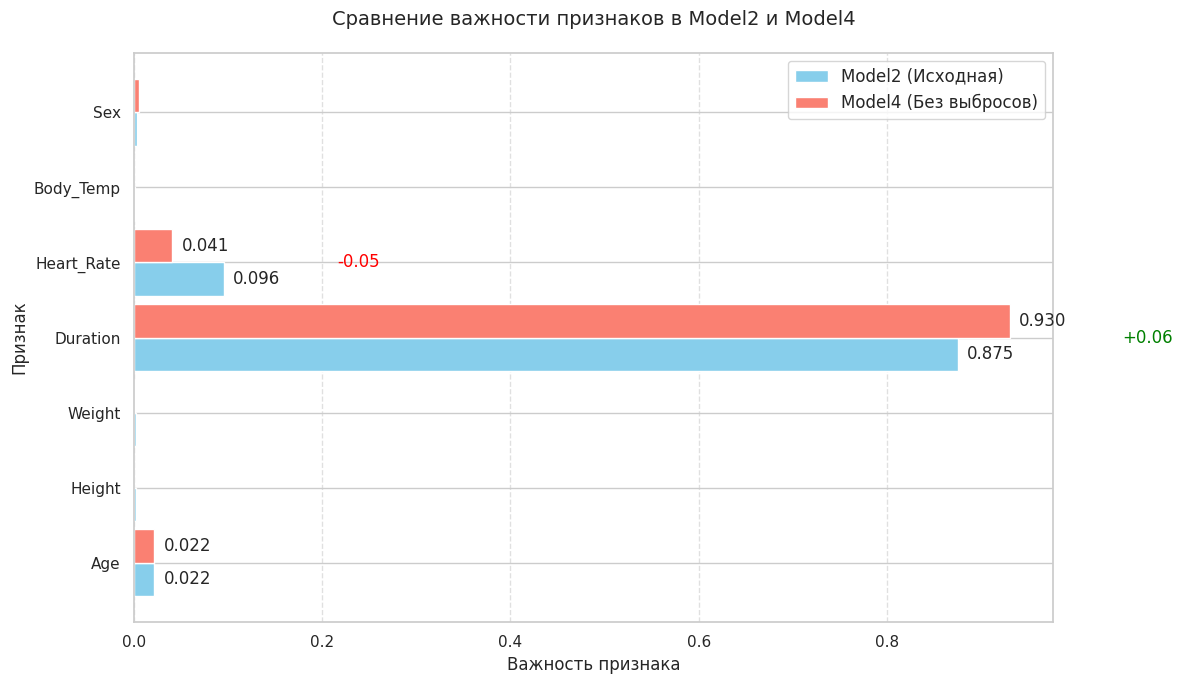

In [44]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

plt.figure(figsize=(12, 7))

# –ü–æ–∑–∏—Ü–∏–∏ –¥–ª—è —Å—Ç–æ–ª–±—Ü–æ–≤
y = np.arange(len(model_columns))
bar_width = 0.45

# –°—Ç–æ–ª–±—Ü—ã –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
bars1 = plt.barh(y - bar_width/2, fi2, bar_width,
                 color='skyblue', label='Model2 (–ò—Å—Ö–æ–¥–Ω–∞—è)')
bars2 = plt.barh(y + bar_width/2, fi4, bar_width,
                 color='salmon', label='Model4 (–ë–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)')

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars1:
    width = bar.get_width()
    if width > 0.01:  # –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center')

for bar in bars2:
    width = bar.get_width()
    if width > 0.01:  # –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–∏–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ Model2 –∏ Model4', fontsize=14, pad=20)
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞', fontsize=12)
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫', fontsize=12)
plt.yticks(y, model_columns)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç—Ä–µ–ª–∫–∏ –¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–π
for i, (m2, m4) in enumerate(zip(fi2, fi4)):
    change = m4 - m2
    if abs(change) > 0.05:  # –†–∏—Å—É–µ–º —Å—Ç—Ä–µ–ª–∫–∏ —Ç–æ–ª—å–∫–æ –¥–ª—è –∑–Ω–∞—á–∏–º—ã—Ö –∏–∑–º–µ–Ω–µ–Ω–∏–π
        arrow_x = max(m2, m4) + 0.05
        plt.annotate('', xy=(arrow_x, i), xytext=(arrow_x, i),
                    arrowprops=dict(arrowstyle='<->', color='green' if change > 0 else 'red', lw=1.5))
        plt.text(arrow_x + 0.07, i, f'{change:+.2f}',
                va='center', color='green' if change > 0 else 'red')

plt.tight_layout()
plt.show()

### <font color='#11a642' size='4'> –ù–∞—Ä–∏—Å—É–π—Ç–µ –¥–µ—Ä–µ–≤–æ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏


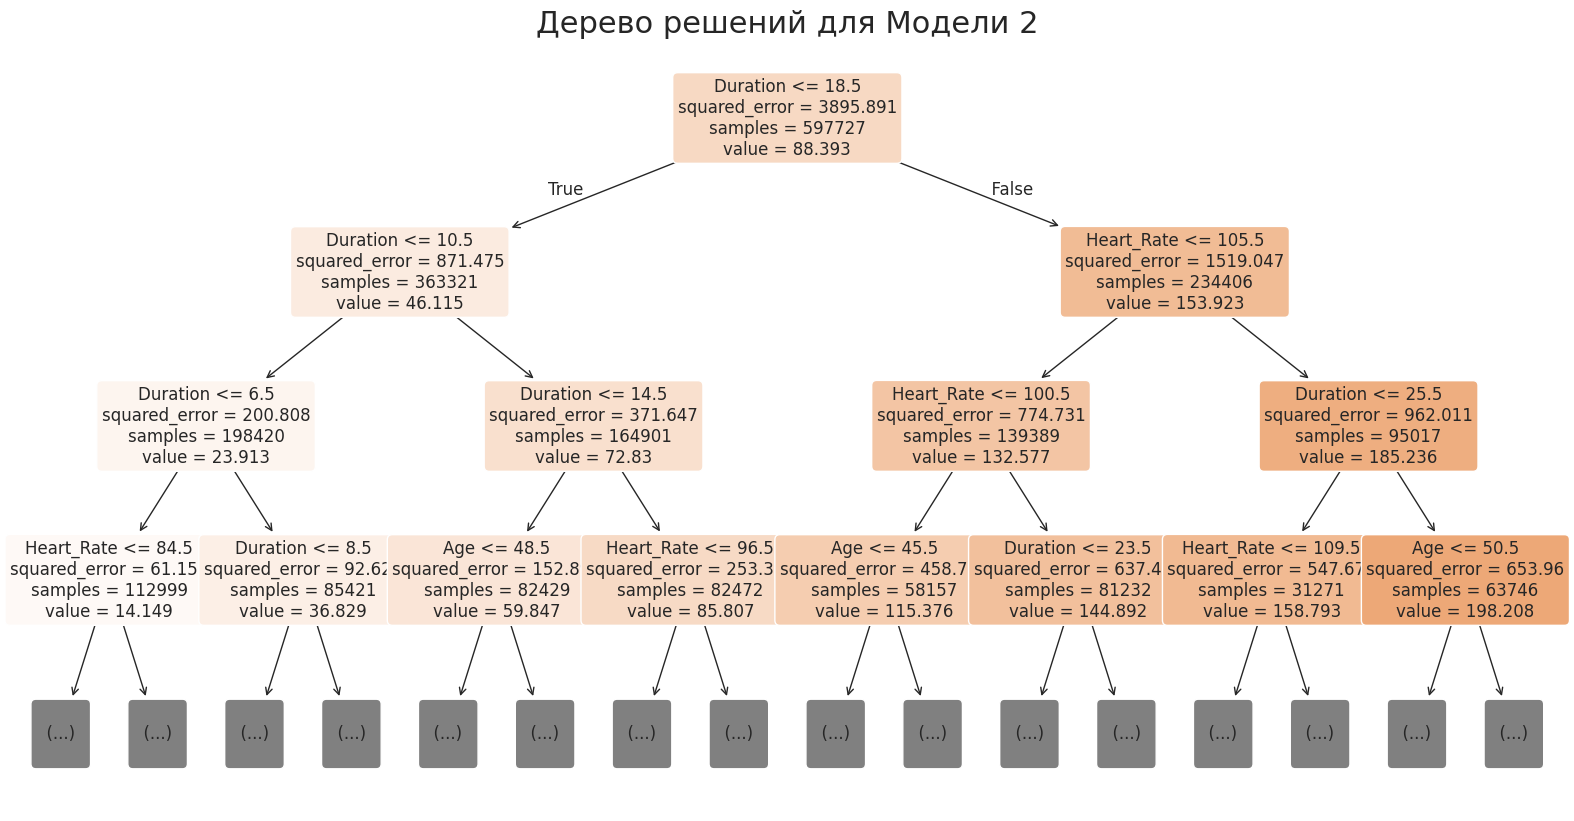

In [45]:
# –ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å (–ú–æ–¥–µ–ª—å 2)

show_tree(2, dt2, model_columns)

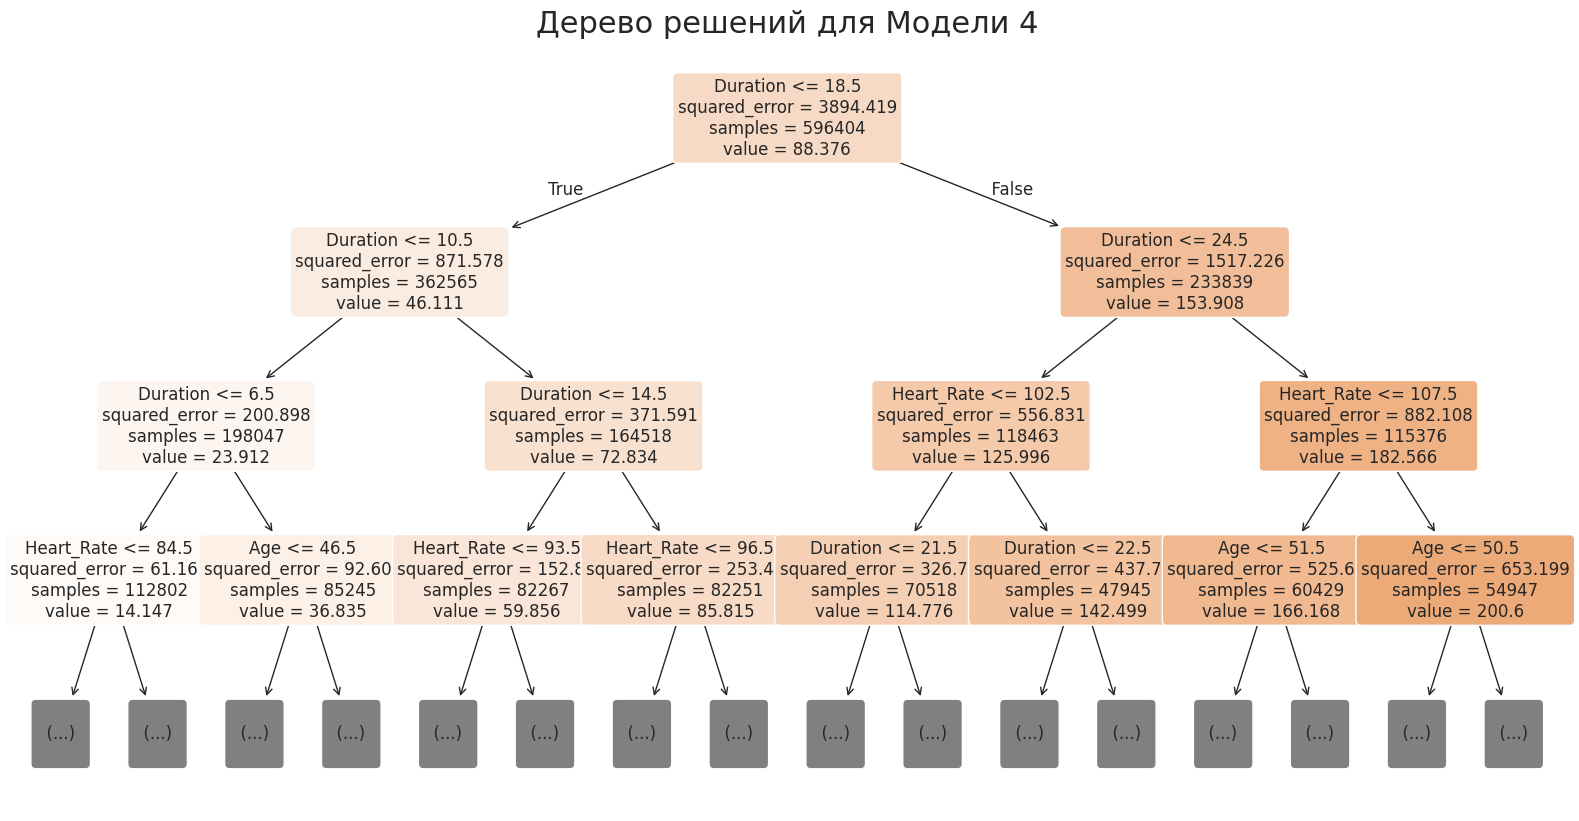

In [46]:
# –ú–æ–¥–µ–ª—å –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ (–ú–æ–¥–µ–ª—å 4)

show_tree(4, dt4, model_columns)

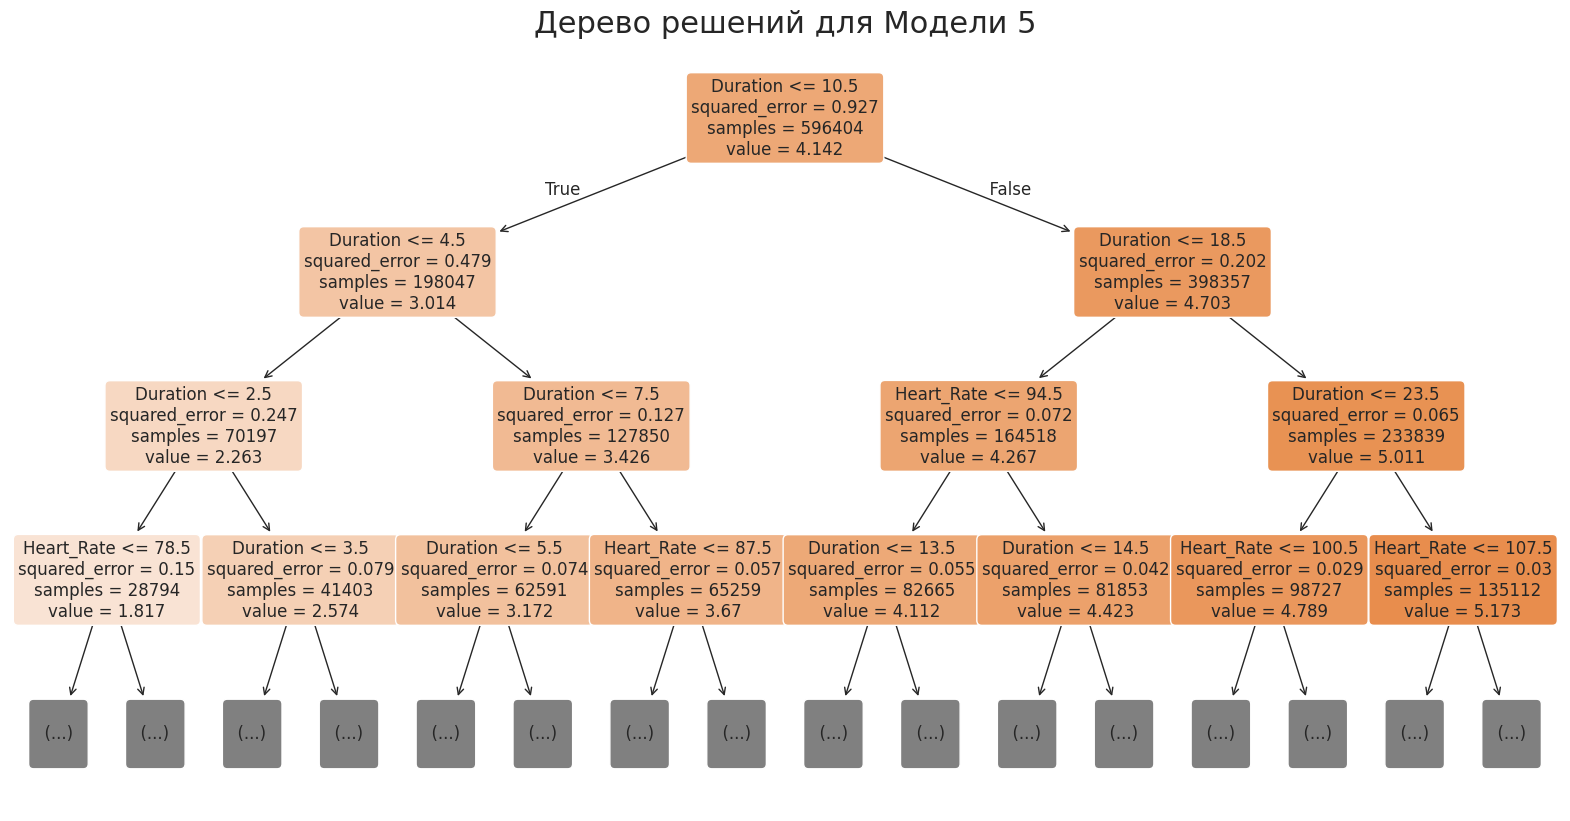

In [47]:
# –ú–æ–¥–µ–ª—å –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å –ª–æ–≥–∏—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–ú–æ–¥–µ–ª—å 5)

show_tree(5, dt5, model_columns)

### ‚úÖ –í—ã–≤–æ–¥ –ø–æ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–µ—Ä–µ–≤—å–µ–≤:
- –ù–∞ —Ç—Ä–µ—Ö —É—Ä–æ–≤–Ω—è—Ö –¥–µ—Ä–µ–≤–∞ –º—ã –Ω–∞–±–ª—é–¥–∞–µ–º, —á—Ç–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∏–¥–µ—Ç –ø–æ —Ç—Ä–µ–º —Å–∞–º—ã–º –≤–∞–∂–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º —Å –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ–º `Duration`.
- –ö–∞–∂–¥–∞—è –∏–∑ –º–æ–¥–µ–ª–µ–π –≤—ã–±–∏—Ä–∞–ª–∞ —Ä–∞–∑–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ä–∞–∑–Ω—ã–µ —É—Å–ª–æ–≤–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è —É–∑–ª–æ–≤ –≤ –¥–µ—Ä–µ–≤–µ —Ä–µ—à–µ–Ω–∏–π.

### <font color='#11a642' size='4'> –í–∞—à–∏ –≤—ã–≤–æ–¥—ã

    
### üìä –ò—Ç–æ–≥–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

| –ú–æ–¥–µ–ª—å     | RMSE Valid | MAE Valid | R¬≤ Valid   | Diff RMSE (%) | –û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏               |
|------------|------------|-----------|------------|---------------|---------------------------|
| Model1     | 5.180      | 3.124     | 0.9931     | +2569%        | –ö–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∏—á–µ—Å–∫–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ |
| Model2     | 5.014      | 3.266     | 0.9935     | +5.75%        | –ë–∞–∑–æ–≤—ã–π –≤–∞—Ä–∏–∞–Ω—Ç           |
| Model3     | 5.568      | 3.769     | 0.9920     | **+2.39%**        | –ù–∞–∏–º–µ–Ω—å—à–µ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, –Ω–æ —Ö—É–¥—à–∏–µ –º–µ—Ç—Ä–∏–∫–∏ |
| Model4 | **4.766**  | **3.050** | **0.9942** | +5.82%    | –õ—É—á—à–∞—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏ –∫–∞—á–µ—Å—Ç–≤–æ |    
| Model5     | 5.198      | 3.255     | 0.9932     | +4.38%        | –õ—É—á—à–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –æ—à–∏–±–∫–∏ (MAPE/RMSLE) |    

### üîç –ö–ª—é—á–µ–≤—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:

1. **–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤**:
   - GridSearchCV –ø–æ–¥–æ–±—Ä–∞–ª –±–æ–ª–µ–µ –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —á–µ–º RandomizedSearchCV
   - RandomizedSearchCV –±—ã–ª–∏ –∑–∞–¥–∞–Ω—ã –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–µ –¥–∏–∞–ø–∞–∑–æ–Ω—ã –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–µ–π, –æ–¥–Ω–∞–∫–æ –Ω–µ –±—ã–ª–æ –¥–æ—Å—Ç–∏–≥–Ω—É—Ç—ã –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ GridSearchCV
   - –ú–æ–¥–µ–ª—å DecisionTreeRegressor –±–µ–∑ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–∫–ª–æ–Ω–Ω–∞ –∫ –¥–∏–∫–æ–º—É –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é
    
2. **–õ–∏–¥–µ—Ä—ã**:
   - **Model4** —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –ø–µ—Ä–≤–µ–Ω—Å—Ç–≤–æ –ø–æ –æ—Å–Ω–æ–≤–Ω—ã–º –º–µ—Ç—Ä–∏–∫–∞–º (RMSE/MAE/R¬≤)
   - **Model5** –ø–æ–∫–∞–∑–∞–ª–∞ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å **Model4**:
     - –£–ª—É—á—à–µ–Ω–∏–µ **MAPE** (5.00% vs 5.13%) –∏ **RMSLE** (0.0744 vs 0.0764)
     - –õ—É—á—à—É—é —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å (Diff RMSE +4.38% vs +5.82%)    

3. **–≠—Ñ—Ñ–µ–∫—Ç –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤**:
   - –£ Model4 —Ä–∞–∑–Ω–∏—Ü–∞ train/valid –æ—Å—Ç–∞–ª–∞—Å—å –Ω–∞ —É—Ä–æ–≤–Ω–µ ~6% (–∫–∞–∫ —É Model2)
   - –ü—Ä–∏ —ç—Ç–æ–º –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏–ª–∏—Å—å
   - –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –≤—ã–±—Ä–æ—Å—ã –≤ ['Height', 'Weight'] –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –≤–ª–∏—è–ª–∏ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ

4. **–°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å Model3**:
   - –•–æ—Ç—è —É –Ω–µ–µ –Ω–∞–∏–º–µ–Ω—å—à–∏–π Diff% (2.39%), –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –Ω–∞ 14-23% —Ö—É–∂–µ Model4
   - –ú–æ–∂–µ—Ç —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –∫—Ä–∏—Ç–∏—á–Ω–∞ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é
    
5. **–≠—Ñ—Ñ–µ–∫—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è** (Model5):
   - –£–º–µ–Ω—å—à–∏–ª–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ (Diff% —Å–Ω–∏–∑–∏–ª—Å—è –Ω–∞ 1.5-2 –ø—É–Ω–∫—Ç–∞)
   - –î–∞–ª–∞ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è MAPE/RMSLE
   - –£—Ö—É–¥—à–∏–ª–∞ MSE/RMSE/MAE –Ω–∞ 6-19%    

### üéØ –ò—Ç–æ–≥–æ–≤—ã–π –≤–µ—Ä–¥–∏–∫—Ç:
**Model4 (—Å —É–¥–∞–ª–µ–Ω–∏–µ–º –≤—ã–±—Ä–æ—Å–æ–≤)** ‚Äî –ª—É—á—à–∏–π –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É:
- –í—ã—Å–æ–∫–∏–º –∫–∞—á–µ—Å—Ç–≤–æ–º (‚ÜìRMSE –Ω–∞ 4.9%, ‚ÜëR¬≤)
- –£–º–µ—Ä–µ–Ω–Ω—ã–º –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º (Diff ~6%)
- –§–∏–∑–∏—á–µ—Å–∫–æ–π –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å—é (–¥–æ–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ Duration)
- Model5 –∏ Model2 –æ—Å—Ç–∞—é—Ç—Å—è –¥–æ–ø—É—Å—Ç–∏–º—ã–º–∏ –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏, –æ—Å–æ–±–µ–Ω–Ω–æ Model2, –µ—Å–ª–∏ –Ω–µ–ª—å–∑—è –∏—Å–∫–ª—é—á–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã.
- –û—Å—Ç–∞–ª—å–Ω—ã–µ –º–æ–¥–µ–ª–∏ –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é—Ç—Å—è.